In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_minRead All Numpy File and Clustered DF Before

Read All Numpy File and Clustered DF Before

In [9]:
# numpy dataset
scaled_Xid = np.loadtxt('scaled_xid.csv', delimiter=',')
scaled_Xjp = np.loadtxt('scaled_xjp.csv', delimiter=',')
scaled_Xkr = np.loadtxt('scaled_xkr.csv', delimiter=',') 

# clustered dataset
indo_cluster = pd.read_csv('clustered_indonesia.csv')
# indo_cluster.drop("Unnamed: 0",axis=1, inplace=True)
japan_cluster = pd.read_csv('clustered_japan.csv')
# japan_cluster.drop("Unnamed: 0",axis=1, inplace=True)
korean_cluster = pd.read_csv('clustered_korean.csv')
# korean_cluster.drop("Unnamed: 0",axis=1, inplace=True)
jkt48_df = pd.read_csv('lagu_jkt48.csv')

# label numpy
# np.savetxt('id_label.csv', id_label, delimiter=',')
id_label = np.loadtxt('id_label.csv', delimiter=',')
jp_label = np.loadtxt('jp_label.csv', delimiter=',')
kr_label = np.loadtxt('kr_label.csv', delimiter=',')

### Pattern Identification of Popular song in Indonesian Demographic

d:\Anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
d:\Anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Computing 31 nearest neighbors...
[t-SNE] Indexed 200 samples in 0.000s...
[t-SNE] Computed neighbors for 200 samples in 0.003s...
[t-SNE] Computed conditional probabilities for sample 200 / 200
[t-SNE] Mean sigma: 0.183080
[t-SNE] KL divergence after 250 iterations with early exaggeration: 70.947815
[t-SNE] KL divergence after 500 iterations: 0.704230


[Text(0.5, 1.0, 'Indonesian Demographic song Pattern')]

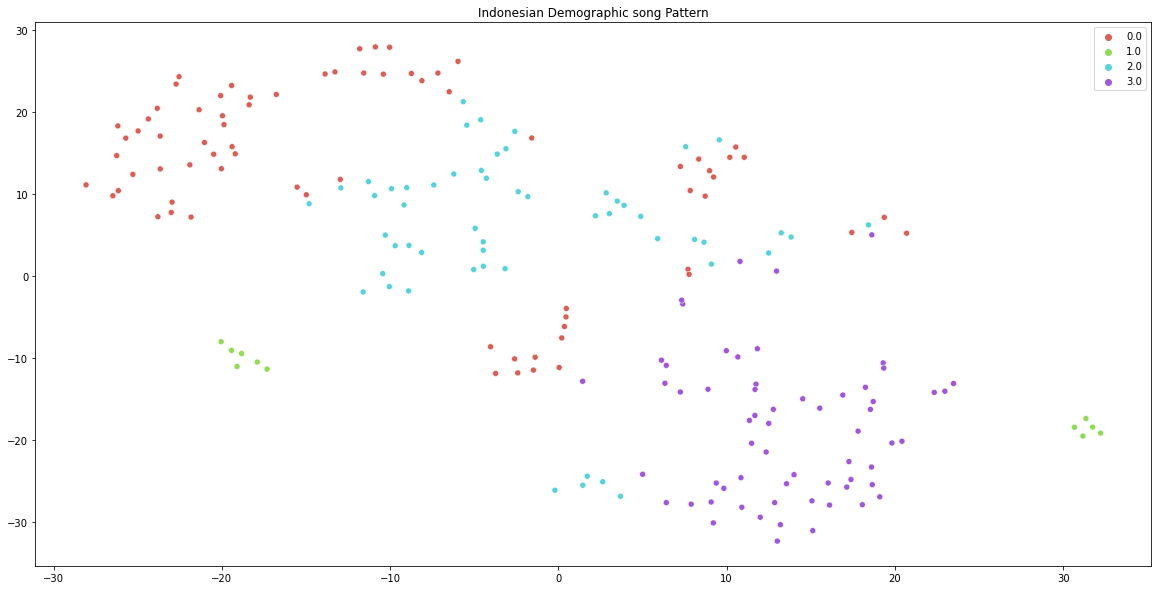

In [5]:
from sklearn.manifold import TSNE

# tsne calculation
tsne_id = TSNE(n_components=2, verbose=1, perplexity=10, n_iter=500)
tsne_results_id = tsne_id.fit_transform(scaled_Xid)

# scatter plot visualization
fig, ax1 = plt.subplots(figsize=(20,10))

sns.scatterplot(
    x=tsne_results_id[:,0], y=tsne_results_id[:,1],
    hue=id_label,
    # jumla cluster pada parameter color palette harus sesuai
    palette=sns.color_palette("hls", 4),
    legend="full"
).set(title='Indonesian Demographic song Pattern')

### Pattern Identification of Popular song in Korean Demographic

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


[t-SNE] Computing 31 nearest neighbors...
[t-SNE] Indexed 200 samples in 0.001s...
[t-SNE] Computed neighbors for 200 samples in 0.003s...
[t-SNE] Computed conditional probabilities for sample 200 / 200
[t-SNE] Mean sigma: 0.164827
[t-SNE] KL divergence after 250 iterations with early exaggeration: 72.344063
[t-SNE] KL divergence after 500 iterations: 0.779731


[Text(0.5, 1.0, 'Korean Demographic song Pattern')]

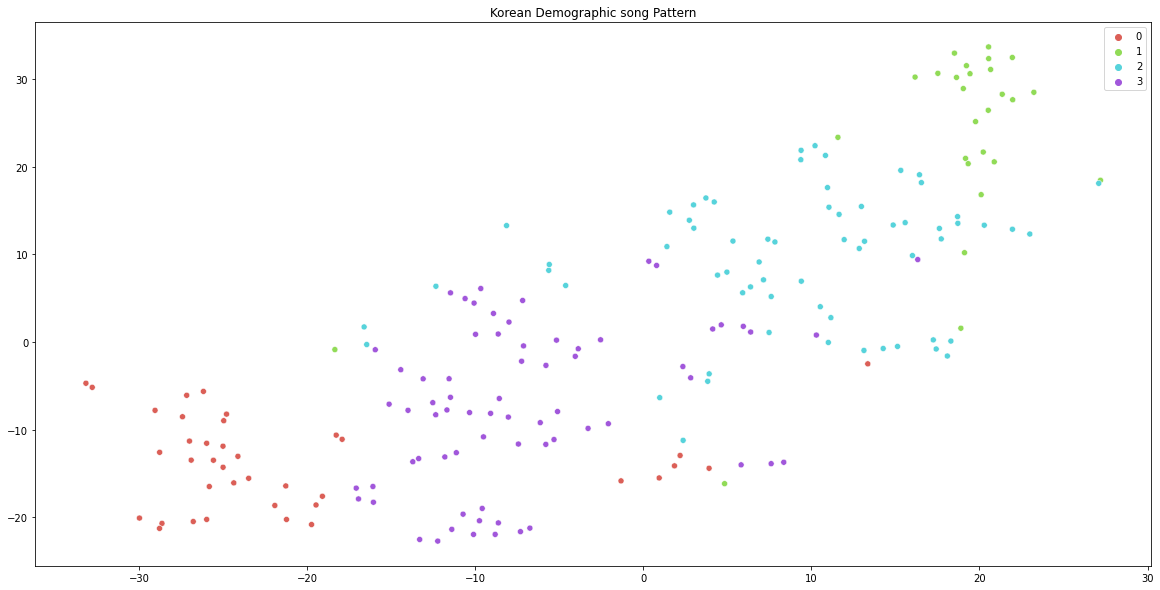

In [ ]:
# tsne calculation
tsne_kr = TSNE(n_components=2, verbose=1, perplexity=10, n_iter=500)
tsne_results_kr = tsne_kr.fit_transform(scaled_Xkr)

# scatter plot visualization
fig, ax1 = plt.subplots(figsize=(20,10))

sns.scatterplot(
    x=tsne_results_kr[:,0], y=tsne_results_kr[:,1],
    hue=kr_label,
    # jumla cluster pada parameter color palette harus sesuai
    palette=sns.color_palette("hls", 4),
    legend="full"
).set(title='Korean Demographic song Pattern')

### Pattern Identification of Popular song in Japan Demographic

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


[t-SNE] Computing 31 nearest neighbors...
[t-SNE] Indexed 200 samples in 0.000s...
[t-SNE] Computed neighbors for 200 samples in 0.003s...
[t-SNE] Computed conditional probabilities for sample 200 / 200
[t-SNE] Mean sigma: 0.186789
[t-SNE] KL divergence after 250 iterations with early exaggeration: 72.275848
[t-SNE] KL divergence after 500 iterations: 0.778091


[Text(0.5, 1.0, 'Japan Demographic song Pattern')]

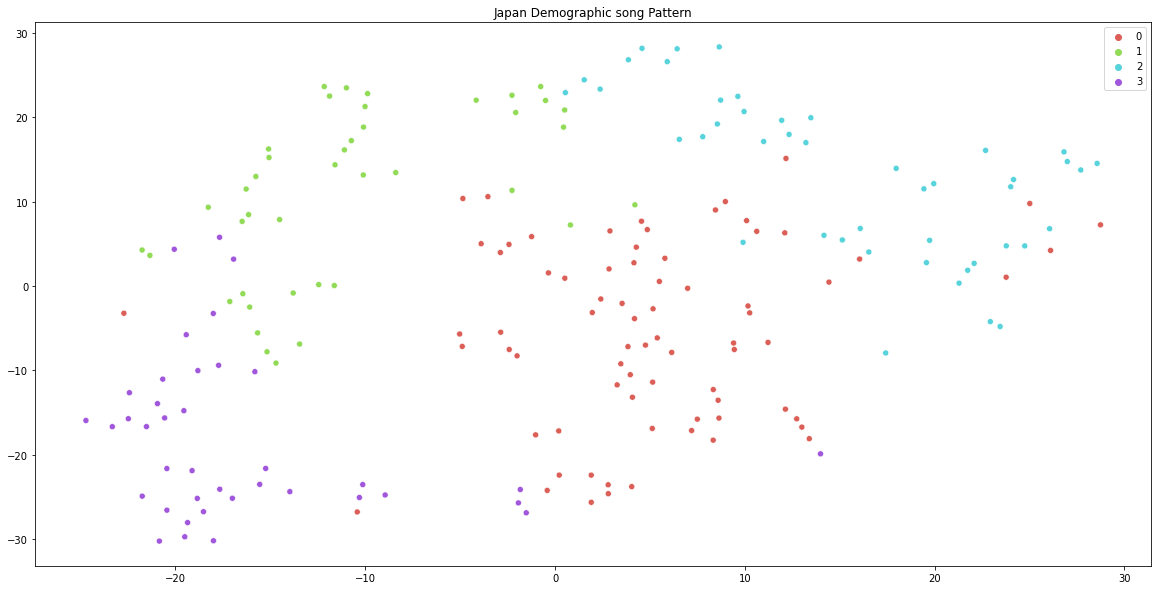

In [ ]:
# tsne calculation
tsne_jp = TSNE(n_components=2, verbose=1, perplexity=10, n_iter=500)
tsne_results_jp = tsne_jp.fit_transform(scaled_Xjp)

# scatter plot visualization
fig, ax1 = plt.subplots(figsize=(20,10))

sns.scatterplot(
    x=tsne_results_jp[:,0], y=tsne_results_jp[:,1],
    hue=jp_label,
    # jumla cluster pada parameter color palette harus sesuai
    palette=sns.color_palette("hls", 4),
    legend="full"
).set(title='Japan Demographic song Pattern')

### Cari Tahu Popularitas lagu dari tiap Cluster

#### Lagu di Demografi masyarakat Indonesia

In [10]:
# rata-rata popularity berdasarkan cluster
indo_cluster.groupby(['cluster']).popularity.mean().sort_values(ascending=False)

cluster
0    69.301370
3    65.983871
2    57.148148
1    18.272727
Name: popularity, dtype: float64

In [11]:
# tampilkan lagu berdasarkan cluster tertentu
indo_cluster.loc[indo_cluster['cluster'] == 0][:10]

,artist name,track name,track id,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,cluster
2,Lizzo,About Damn Time,1PckUlxKqWQs3RlWXVBLw3,95,0.836,0.743,10,-6.305,0,0.0656,0.0995,0.000000,0.3350,0.722,108.966,191822,4,0
3,Harry Styles,Late Night Talking,1qEmFfgcLObUfQm0j1W2CK,95,0.714,0.728,10,-4.595,1,0.0468,0.2980,0.000000,0.1060,0.901,114.996,177955,4,0
4,Charlie Puth,Left and Right (Feat. Jung Kook of BTS),0mBP9X2gPCuapvpZ7TGDk3,94,0.881,0.592,2,-4.898,1,0.0324,0.6190,0.000013,0.0901,0.719,101.058,154487,4,0
6,Post Malone,I Like You (A Happier Song) (with Doja Cat),0O6u0VJ46W86TxN9wgyqDj,92,0.733,0.670,5,-6.009,1,0.0751,0.1210,0.000000,0.1210,0.472,100.964,192841,4,0
7,Jack Harlow,First Class,1rDQ4oMwGJI7B4tovsBOxc,92,0.905,0.563,8,-6.135,1,0.1020,0.0254,0.000010,0.1130,0.324,106.998,173948,4,0
8,Camila Cabello,Bam Bam (feat. Ed Sheeran),0QBzMgT7NIeoCYy3sJCof1,91,0.756,0.697,8,-6.377,1,0.0401,0.1820,0.000000,0.3330,0.956,94.996,206071,4,0
9,Beyoncé,BREAK MY SOUL,2KukL7UlQ8TdvpaA7bY3ZJ,91,0.687,0.887,1,-5.040,0,0.0826,0.0575,0.000002,0.2700,0.853,114.941,278282,4,0
10,OneRepublic,I Ain't Worried,4h9wh7iOZ0GGn8QVp4RAOB,91,0.704,0.797,0,-5.927,1,0.0475,0.0826,0.000745,0.0546,0.825,139.994,148486,4,0
12,Doja Cat,Vegas (From the Original Motion Picture Soundt...,0hquQWY3xvYqN4qtiquniF,90,0.801,0.601,8,-7.574,0,0.2550,0.0777,0.000032,0.1450,0.740,159.969,182907,4,0
13,Calvin Harris,Potion (with Dua Lipa & Young Thug),7fYRg3CEbk6rNCuzNzMT06,89,0.824,0.697,11,-4.869,0,0.0473,0.1580,0.000041,0.0770,0.757,99.988,214460,4,0


In [ ]:
# distribusi statitik dari data pada tiap kolom,  dan per cluster
indo_cluster.groupby('cluster').describe()

popularity                                                        \
             count       mean        std   min    25%   50%    75%   max   
cluster                                                                    
0             73.0  69.301370  23.265786  10.0  64.00  76.0  83.00  95.0   
1             11.0  18.272727   4.818525  10.0  17.00  19.0  21.00  26.0   
2             54.0  57.148148  26.793696   9.0  31.00  66.5  76.75  99.0   
3             62.0  65.983871  14.955115  15.0  59.25  65.5  75.00  99.0   

        danceability            ... duration_ms            time_signature  \
               count      mean  ...         75%        max          count   
cluster                         ...                                         
0               73.0  0.746479  ...   212687.00   336254.0           73.0   
1               11.0  0.481636  ...   371747.00   649000.0           11.0   
2               54.0  0.523463  ...   235581.25  3100640.0           54.0   
3               62.0  0.511661  ...   253500.00   336001.0           62.0   

                                                      
             mean       std  min  25%  50%  75%  max  
cluster                                               
0        4.013699  0.117041  4.0  4.0  4.0  4.0  5.0  
1        3.909091  0.301511  3.0  4.0  4.0  4.0  4.0  
2        3.833333  0.376177  3.0  4.0  4.0  4.0  4.0  
3        3.774194  0.421526  3.0  4.0  4.0  4.0  4.0  

[4 rows x 112 columns]

#### Lagu di Demografi masyarakat Korea

In [ ]:
# rata-rata popularity berdasarkan cluster
korean_cluster.groupby(['cluster']).popularity.mean().sort_values(ascending=False)

cluster
2    69.169231
0    68.552632
3    67.085714
1    62.259259
Name: popularity, dtype: float64

In [ ]:
# tampilkan lagu berdasarkan cluster tertentu
korean_cluster.loc[korean_cluster['cluster'] == 2][:10]

,artist name,track name,track id,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,cluster
2,Charlie Puth,Left and Right (Feat. Jung Kook of BTS),0mBP9X2gPCuapvpZ7TGDk3,94,0.881,0.592,2,-4.898,1,0.0324,0.61900,0.000013,0.0901,0.719,101.058,154487,4,2
166,Jack Harlow,First Class,1rDQ4oMwGJI7B4tovsBOxc,92,0.905,0.563,8,-6.135,1,0.1020,0.02540,0.000010,0.1130,0.324,106.998,173948,4,2
44,Post Malone,I Like You (A Happier Song) (with Doja Cat),0O6u0VJ46W86TxN9wgyqDj,92,0.733,0.670,5,-6.009,1,0.0751,0.12100,0.000000,0.1210,0.472,100.964,192841,4,2
531,Future,WAIT FOR U (feat. Drake & Tems),59nOXPmaKlBfGMDeOVGrIK,91,0.463,0.642,1,-4.474,1,0.3400,0.31400,0.000000,0.0686,0.339,83.389,189893,4,2
300,Harry Styles,Music For a Sushi Restaurant,5LYMamLv12UPbemOaTPyeV,91,0.720,0.715,11,-4.652,1,0.0400,0.25800,0.056800,0.1070,0.357,107.041,193813,4,2
629,Benson Boone,In The Stars,1ei3hzQmrgealgRKFxIcWn,88,0.362,0.540,10,-6.031,1,0.0528,0.33800,0.000000,0.1390,0.300,78.007,216410,3,2
20,j-hope,MORE,4XKXphKH76W4zNpkgFS5o2,87,0.783,0.722,2,-4.864,1,0.0357,0.00537,0.002090,0.1050,0.306,97.031,180022,4,2
621,Kanye West,True Love,06JvOZ39sK8D8SqiqfaxDU,87,0.712,0.861,5,-5.487,0,0.2500,0.01820,0.000006,0.5110,0.388,84.042,148571,4,2
407,The Kid LAROI,Thousand Miles,1r8ZCjfrQxoy2wVaBUbpwg,87,0.376,0.657,7,-4.658,1,0.0768,0.08580,0.000000,0.0884,0.203,80.565,164782,4,2
475,Kendrick Lamar,N95,0fX4oNGBWO3dSGUZcVdVV2,86,0.790,0.670,1,-5.527,1,0.1050,0.37700,0.000002,0.1190,0.408,139.956,195950,4,2


In [ ]:
# distribusi statitik dari data pada tiap kolom,  dan per cluster
korean_cluster.groupby('cluster').describe()

popularity                                                       \
             count       mean        std   min   25%   50%    75%   max   
cluster                                                                   
0             38.0  68.552632  16.758535  38.0  53.5  71.5  81.00  99.0   
1             27.0  62.259259  18.509026  42.0  46.0  51.0  78.50  99.0   
2             65.0  69.169231  15.927148  38.0  55.0  71.0  83.00  94.0   
3             70.0  67.085714  15.939871  36.0  54.0  68.0  80.75  95.0   

        danceability            ... duration_ms           time_signature  \
               count      mean  ...         75%       max          count   
cluster                         ...                                        
0               38.0  0.567579  ...    209453.0  248819.0           38.0   
1               27.0  0.524148  ...    234674.5  281360.0           27.0   
2               65.0  0.675123  ...    213427.0  264481.0           65.0   
3               70.0  0.755843  ...    203693.5  278282.0           70.0   

                                                      
             mean       std  min  25%  50%  75%  max  
cluster                                               
0        3.973684  0.162221  3.0  4.0  4.0  4.0  4.0  
1        3.740741  0.446576  3.0  3.5  4.0  4.0  4.0  
2        3.969231  0.174036  3.0  4.0  4.0  4.0  4.0  
3        4.014286  0.119523  4.0  4.0  4.0  4.0  5.0  

[4 rows x 112 columns]

#### Lagu di Demografi masyarakat Jepang

In [ ]:
# rata-rata popularity berdasarkan cluster
japan_cluster.groupby(['cluster']).popularity.mean().sort_values(ascending=False)

cluster
0    69.706667
3    69.666667
1    68.121951
2    67.822222
Name: popularity, dtype: float64

In [ ]:
# tampilkan lagu berdasarkan cluster tertentu
japan_cluster.loc[japan_cluster['cluster'] == 0][:10]

,artist name,track name,track id,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,cluster
688,Bad Bunny,Me Porto Bonito,6Sq7ltF9Qa7SNFBsV5Cogx,100,0.911,0.712,1,-5.105,0,0.0817,0.09010,0.000027,0.0933,0.425,92.005,178567,4,0
261,Harry Styles,Late Night Talking,1qEmFfgcLObUfQm0j1W2CK,95,0.714,0.728,10,-4.595,1,0.0468,0.29800,0.000000,0.1060,0.901,114.996,177955,4,0
486,Jack Harlow,First Class,1rDQ4oMwGJI7B4tovsBOxc,92,0.905,0.563,8,-6.135,1,0.1020,0.02540,0.000010,0.1130,0.324,106.998,173948,4,0
231,Post Malone,I Like You (A Happier Song) (with Doja Cat),0O6u0VJ46W86TxN9wgyqDj,92,0.733,0.670,5,-6.009,1,0.0751,0.12100,0.000000,0.1210,0.472,100.964,192841,4,0
204,OneRepublic,I Ain't Worried,4h9wh7iOZ0GGn8QVp4RAOB,91,0.704,0.797,0,-5.927,1,0.0475,0.08260,0.000745,0.0546,0.825,139.994,148486,4,0
354,Camila Cabello,Bam Bam (feat. Ed Sheeran),0QBzMgT7NIeoCYy3sJCof1,91,0.756,0.697,8,-6.377,1,0.0401,0.18200,0.000000,0.3330,0.956,94.996,206071,4,0
290,Calvin Harris,Potion (with Dua Lipa & Young Thug),7fYRg3CEbk6rNCuzNzMT06,89,0.824,0.697,11,-4.869,0,0.0473,0.15800,0.000041,0.0770,0.757,99.988,214460,4,0
87,BTS,Run BTS,69xohKu8C1fsflYAiSNbwM,89,0.724,0.818,8,-3.747,1,0.1680,0.02010,0.000000,0.0358,0.696,77.004,204940,4,0
380,Megan Thee Stallion,Sweetest Pie,7mFj0LlWtEJaEigguaWqYh,87,0.814,0.628,7,-7.178,1,0.2210,0.16700,0.000000,0.1010,0.677,123.977,201334,4,0
652,Måneskin,SUPERMODEL,63WuQOXohQIxOxIFA2K7bR,87,0.636,0.876,7,-3.413,1,0.0555,0.00164,0.000000,0.1170,0.799,120.983,148064,4,0


In [ ]:
# distribusi statitik dari data pada tiap kolom,  dan per cluster
japan_cluster.groupby('cluster').describe()

popularity                                                       \
             count       mean        std   min   25%   50%   75%    max   
cluster                                                                   
0             75.0  69.706667  11.729811  56.0  60.5  66.0  77.5  100.0   
1             41.0  68.121951  10.945764  56.0  59.0  65.0  74.0   99.0   
2             45.0  67.822222  10.656387  56.0  61.0  66.0  73.0   98.0   
3             39.0  69.666667  13.454276  56.0  58.5  65.0  77.5   99.0   

        danceability            ... duration_ms           time_signature  \
               count      mean  ...         75%       max          count   
cluster                         ...                                        
0               75.0  0.728187  ...    221961.5  339870.0           75.0   
1               41.0  0.530244  ...    239200.0  372309.0           41.0   
2               45.0  0.668644  ...    249427.0  308809.0           45.0   
3               39.0  0.602077  ...    264407.0  326104.0           39.0   

                                                      
             mean       std  min  25%  50%  75%  max  
cluster                                               
0        4.000000  0.000000  4.0  4.0  4.0  4.0  4.0  
1        3.975610  0.156174  3.0  4.0  4.0  4.0  4.0  
2        4.000000  0.000000  4.0  4.0  4.0  4.0  4.0  
3        3.897436  0.307355  3.0  4.0  4.0  4.0  4.0  

[4 rows x 112 columns]

## Bandingkan dengan lagu JKT48

In [ ]:
# inisiasi fitur lagu jkt48 sebagai Y
Y = jkt48_df[['danceability', 'acousticness', 'energy', 'liveness', 'loudness', 'tempo', 
              'valence', 'instrumentalness']].values
              

### gunakan model berbeda dengan lagu jkt48

In [ ]:
# predict model lagu jepang ke jkt48
jkt_jp_label = kmean_jp.predict(Y)
np.unique(jkt_jp_label, return_counts=True)

(array([2], dtype=int32), array([195]))

In [ ]:
# predict model lagu korea ke jkt48
jkt_kr_label = kmean_kr.predict(Y)
np.unique(jkt_kr_label, return_counts=True)

(array([0], dtype=int32), array([195]))

In [ ]:
# predict model lagu indonesia ke jkt48
jkt_id_label = kmean_id.predict(Y)
np.unique(jkt_id_label, return_counts=True)

(array([2], dtype=int32), array([195]))

### Masukan label dari ketiga model berbeda ke lagu jkt49

In [ ]:
df_jkt_id = jkt48_df.copy()
df_jkt_id['cluster id'] = jkt_id_label
df_jkt_id.head()

,album,track_number,id,name,uri,key,mode,danceability,acousticness,energy,liveness,loudness,tempo,valence,instrumentalness,speechiness,duration_ms,time_signature,popularity,cluster id
0,Sambil Menggandeng Erat Tanganku,1,7mGO7lGxnJhMWtqERZig8l,Angin Kita,spotify:track:7mGO7lGxnJhMWtqERZig8l,5,1,0.554,0.0582,0.583,0.3260,-11.260,106.997,0.662,0.0,0.0343,279708,4,27,2
1,Sambil Menggandeng Erat Tanganku,2,1TdhewZV5VYPZY1ahpfgBE,Mango No. 2,spotify:track:1TdhewZV5VYPZY1ahpfgBE,1,0,0.614,0.2120,0.602,0.0829,-11.706,170.008,0.795,0.0,0.0488,231404,4,25,2
2,Sambil Menggandeng Erat Tanganku,3,4fhJ1jFoIapbdiW8aDccHc,Sambil Menggandeng Erat Tanganku,spotify:track:4fhJ1jFoIapbdiW8aDccHc,5,1,0.515,0.0344,0.692,0.8020,-10.994,163.954,0.642,0.0,0.0520,264684,4,32,2
3,Sambil Menggandeng Erat Tanganku,4,0eotVbveGVkC4gPvzdvks5,Bel Sekolah adalah Love Song,spotify:track:0eotVbveGVkC4gPvzdvks5,7,1,0.452,0.0167,0.625,0.3350,-11.097,175.068,0.679,0.0,0.0429,232121,4,31,2
4,Sambil Menggandeng Erat Tanganku,5,2N6KAievdXztAwHzcymJdz,Glory Days,spotify:track:2N6KAievdXztAwHzcymJdz,0,1,0.553,0.0823,0.752,0.0674,-12.588,172.056,0.816,0.0,0.0340,295535,4,28,2


In [ ]:
closest_jktid, _ = pairwise_distances_argmin_min(kmean_id.cluster_centers_, Y)
closest_jktid

array([188, 188, 188, 188])

In [ ]:
df_jkt_id.iloc[[188],[3,7,8,9,10,11,12,13,18]]

,name,danceability,acousticness,energy,liveness,loudness,tempo,valence,popularity
188,Menanti,0.697,0.792,0.261,0.0911,-7.673,73.924,0.408,38


In [ ]:
df_jkt_kr = jkt48_df.copy()
df_jkt_kr['cluster kr'] = jkt_kr_label
df_jkt_kr.head()

,album,track_number,id,name,uri,key,mode,danceability,acousticness,energy,liveness,loudness,tempo,valence,instrumentalness,speechiness,duration_ms,time_signature,popularity,cluster kr
0,Sambil Menggandeng Erat Tanganku,1,7mGO7lGxnJhMWtqERZig8l,Angin Kita,spotify:track:7mGO7lGxnJhMWtqERZig8l,5,1,0.554,0.0582,0.583,0.3260,-11.260,106.997,0.662,0.0,0.0343,279708,4,27,0
1,Sambil Menggandeng Erat Tanganku,2,1TdhewZV5VYPZY1ahpfgBE,Mango No. 2,spotify:track:1TdhewZV5VYPZY1ahpfgBE,1,0,0.614,0.2120,0.602,0.0829,-11.706,170.008,0.795,0.0,0.0488,231404,4,25,0
2,Sambil Menggandeng Erat Tanganku,3,4fhJ1jFoIapbdiW8aDccHc,Sambil Menggandeng Erat Tanganku,spotify:track:4fhJ1jFoIapbdiW8aDccHc,5,1,0.515,0.0344,0.692,0.8020,-10.994,163.954,0.642,0.0,0.0520,264684,4,32,0
3,Sambil Menggandeng Erat Tanganku,4,0eotVbveGVkC4gPvzdvks5,Bel Sekolah adalah Love Song,spotify:track:0eotVbveGVkC4gPvzdvks5,7,1,0.452,0.0167,0.625,0.3350,-11.097,175.068,0.679,0.0,0.0429,232121,4,31,0
4,Sambil Menggandeng Erat Tanganku,5,2N6KAievdXztAwHzcymJdz,Glory Days,spotify:track:2N6KAievdXztAwHzcymJdz,0,1,0.553,0.0823,0.752,0.0674,-12.588,172.056,0.816,0.0,0.0340,295535,4,28,0


In [ ]:
closest_jktkr, _ = pairwise_distances_argmin_min(kmean_kr.cluster_centers_, Y)
closest_jktkr

array([188, 188, 188, 188])

In [ ]:
df_jkt_kr.iloc[[188],[3,7,8,9,10,11,12,13,18]]

,name,danceability,acousticness,energy,liveness,loudness,tempo,valence,popularity
188,Menanti,0.697,0.792,0.261,0.0911,-7.673,73.924,0.408,38


In [ ]:
df_jkt_jp = jkt48_df.copy()
df_jkt_jp['cluster jp'] = jkt_jp_label
df_jkt_jp.head()

,album,track_number,id,name,uri,key,mode,danceability,acousticness,energy,liveness,loudness,tempo,valence,instrumentalness,speechiness,duration_ms,time_signature,popularity,cluster jp
0,Sambil Menggandeng Erat Tanganku,1,7mGO7lGxnJhMWtqERZig8l,Angin Kita,spotify:track:7mGO7lGxnJhMWtqERZig8l,5,1,0.554,0.0582,0.583,0.3260,-11.260,106.997,0.662,0.0,0.0343,279708,4,27,2
1,Sambil Menggandeng Erat Tanganku,2,1TdhewZV5VYPZY1ahpfgBE,Mango No. 2,spotify:track:1TdhewZV5VYPZY1ahpfgBE,1,0,0.614,0.2120,0.602,0.0829,-11.706,170.008,0.795,0.0,0.0488,231404,4,25,2
2,Sambil Menggandeng Erat Tanganku,3,4fhJ1jFoIapbdiW8aDccHc,Sambil Menggandeng Erat Tanganku,spotify:track:4fhJ1jFoIapbdiW8aDccHc,5,1,0.515,0.0344,0.692,0.8020,-10.994,163.954,0.642,0.0,0.0520,264684,4,32,2
3,Sambil Menggandeng Erat Tanganku,4,0eotVbveGVkC4gPvzdvks5,Bel Sekolah adalah Love Song,spotify:track:0eotVbveGVkC4gPvzdvks5,7,1,0.452,0.0167,0.625,0.3350,-11.097,175.068,0.679,0.0,0.0429,232121,4,31,2
4,Sambil Menggandeng Erat Tanganku,5,2N6KAievdXztAwHzcymJdz,Glory Days,spotify:track:2N6KAievdXztAwHzcymJdz,0,1,0.553,0.0823,0.752,0.0674,-12.588,172.056,0.816,0.0,0.0340,295535,4,28,2


In [ ]:
closest_jktjp, _ = pairwise_distances_argmin_min(kmean_jp.cluster_centers_, Y)
closest_jktjp

array([188, 188, 188, 188])

In [ ]:
df_jkt_jp.iloc[[188],[3,7,8,9,10,11,12,13,18]]

,name,danceability,acousticness,energy,liveness,loudness,tempo,valence,popularity
188,Menanti,0.697,0.792,0.261,0.0911,-7.673,73.924,0.408,38


### Mencocokan lagu jkt48 dengan lagu dari demografi indonesia, korea dan jepang

#### JKT48 - Demografi Indo

In [ ]:
# membandingkan lagu jkt48 dengan lagu yang populer di indo
song_index_id, distance_song_id = pairwise_distances_argmin_min(Y,scaled_Xid)
np.argsort(distance_song_id)[:3]

array([188,  80,  33])

In [ ]:
song_index_id[[188,  80,  33]]

array([161, 161, 197])

In [ ]:
jkt48_df.iloc[[188,  80,  33]]

,album,track_number,id,name,uri,key,mode,danceability,acousticness,energy,liveness,loudness,tempo,valence,instrumentalness,speechiness,duration_ms,time_signature,popularity
188,Rapsodi,3,733SiVQU5Lz0gWkTf4Zhov,Menanti,spotify:track:733SiVQU5Lz0gWkTf4Zhov,5,1,0.697,0.79200,0.261,0.0911,-7.673,73.924,0.408,0.0,0.0320,220000,4,38
80,Dareka no Tame ni - Demi Seseorang,4,0kxa9QomcAR3FdT1S9fUfw,Bird,spotify:track:0kxa9QomcAR3FdT1S9fUfw,4,0,0.550,0.00105,0.629,0.1670,-10.098,74.990,0.495,0.0,0.0323,248400,4,23
33,Theater no Megami: Dewi Theater,4,2G578dOOQmocYcjvhHNPir,Stripper Cinta,spotify:track:2G578dOOQmocYcjvhHNPir,2,1,0.466,0.06790,0.892,0.1270,-3.632,76.015,0.803,0.0,0.0488,279000,4,19


In [ ]:
indo_cluster.iloc[[161, 161, 197]]

,artist name,track name,track id,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,cluster
157,Christina Aguilera,"Lady Marmalade - From ""Moulin Rouge"" Soundtrack",3uRUbppUFPsmrccRXSDAjE,34,0.756,0.809,5,-3.655,1,0.0541,0.017300,0.000004,0.660,0.640,109.901,264847,4,0
157,Christina Aguilera,"Lady Marmalade - From ""Moulin Rouge"" Soundtrack",3uRUbppUFPsmrccRXSDAjE,34,0.756,0.809,5,-3.655,1,0.0541,0.017300,0.000004,0.660,0.640,109.901,264847,4,0
114,Oxygen,Am I On Your Mind (Lustral Remix) - 2022 Remaster,4LLGGhY3ZSRVw3IulVVVcy,10,0.521,0.858,7,-5.305,1,0.0545,0.000018,0.896000,0.708,0.235,134.989,263657,4,1


#### JKT48 - Demografi Jepang

In [ ]:
# membandingkan lagu jkt48 dengan lagu yang populer di jepang
song_index_jp, distance_song_jp = pairwise_distances_argmin_min(Y,scaled_Xjp)
np.argsort(distance_song_jp)[:3]

array([188,  80,  33])

In [ ]:
song_index_jp[[188,  80,  33]]

array([85, 85, 85])

In [ ]:
jkt48_df.iloc[[188,  80,  33]]

,album,track_number,id,name,uri,key,mode,danceability,acousticness,energy,liveness,loudness,tempo,valence,instrumentalness,speechiness,duration_ms,time_signature,popularity
188,Rapsodi,3,733SiVQU5Lz0gWkTf4Zhov,Menanti,spotify:track:733SiVQU5Lz0gWkTf4Zhov,5,1,0.697,0.79200,0.261,0.0911,-7.673,73.924,0.408,0.0,0.0320,220000,4,38
80,Dareka no Tame ni - Demi Seseorang,4,0kxa9QomcAR3FdT1S9fUfw,Bird,spotify:track:0kxa9QomcAR3FdT1S9fUfw,4,0,0.550,0.00105,0.629,0.1670,-10.098,74.990,0.495,0.0,0.0323,248400,4,23
33,Theater no Megami: Dewi Theater,4,2G578dOOQmocYcjvhHNPir,Stripper Cinta,spotify:track:2G578dOOQmocYcjvhHNPir,2,1,0.466,0.06790,0.892,0.1270,-3.632,76.015,0.803,0.0,0.0488,279000,4,19


In [ ]:
korean_cluster.iloc[[85]]

,artist name,track name,track id,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,cluster
401,Official HIGE DANdism,Mixed Nuts,3RFL9hE5cBocBsjD5XLJLQ,72,0.542,0.918,6,-5.074,1,0.0937,0.0101,0.0,0.259,0.784,150.094,213438,4,0


#### JKT48 - Demografi Korea

In [ ]:
# membandingkan lagu jkt48 dengan lagu yang populer di korea
song_index_kr, distance_song_kr = pairwise_distances_argmin_min(Y,scaled_Xkr)
np.argsort(distance_song_kr)[:3]

array([188,  80,  33])

In [ ]:
song_index_kr[[188,  80,  33]]

array([79, 79, 79])

In [ ]:
jkt48_df.iloc[[188,  80,  33]]

,album,track_number,id,name,uri,key,mode,danceability,acousticness,energy,liveness,loudness,tempo,valence,instrumentalness,speechiness,duration_ms,time_signature,popularity
188,Rapsodi,3,733SiVQU5Lz0gWkTf4Zhov,Menanti,spotify:track:733SiVQU5Lz0gWkTf4Zhov,5,1,0.697,0.79200,0.261,0.0911,-7.673,73.924,0.408,0.0,0.0320,220000,4,38
80,Dareka no Tame ni - Demi Seseorang,4,0kxa9QomcAR3FdT1S9fUfw,Bird,spotify:track:0kxa9QomcAR3FdT1S9fUfw,4,0,0.550,0.00105,0.629,0.1670,-10.098,74.990,0.495,0.0,0.0323,248400,4,23
33,Theater no Megami: Dewi Theater,4,2G578dOOQmocYcjvhHNPir,Stripper Cinta,spotify:track:2G578dOOQmocYcjvhHNPir,2,1,0.466,0.06790,0.892,0.1270,-3.632,76.015,0.803,0.0,0.0488,279000,4,19


In [ ]:
korean_cluster.iloc[[79]]

,artist name,track name,track id,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,cluster
731,Machine Gun Kelly,emo girl (feat. WILLOW),3tBZ60j1jQ7NJm8IjelyQe,75,0.412,0.881,2,-3.502,1,0.087,0.00039,0.000058,0.923,0.359,165.012,159096,4,0


### Membandingkan cluster lagu dari yang terkenal dari demografi asalnya dengan lagu yang di jkt48

#### Lagu di Indonesia
lagu indonesia yang populer dari cluster di cluster 0, sementara yang dipakai ke jkt48 cluster 2

In [ ]:
# cluster yang paling populer
indo_cluster.groupby(['cluster']).popularity.mean().sort_values(ascending=False)

cluster
0    69.301370
3    65.983871
2    57.148148
1    18.272727
Name: popularity, dtype: float64

In [ ]:
df_jkt_id['cluster id'].unique()

array([2], dtype=int32)

Membandingkan Cluster 1 (yang paling populer) dengan Cluster 3 (yang nempel di lagu jkt48)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

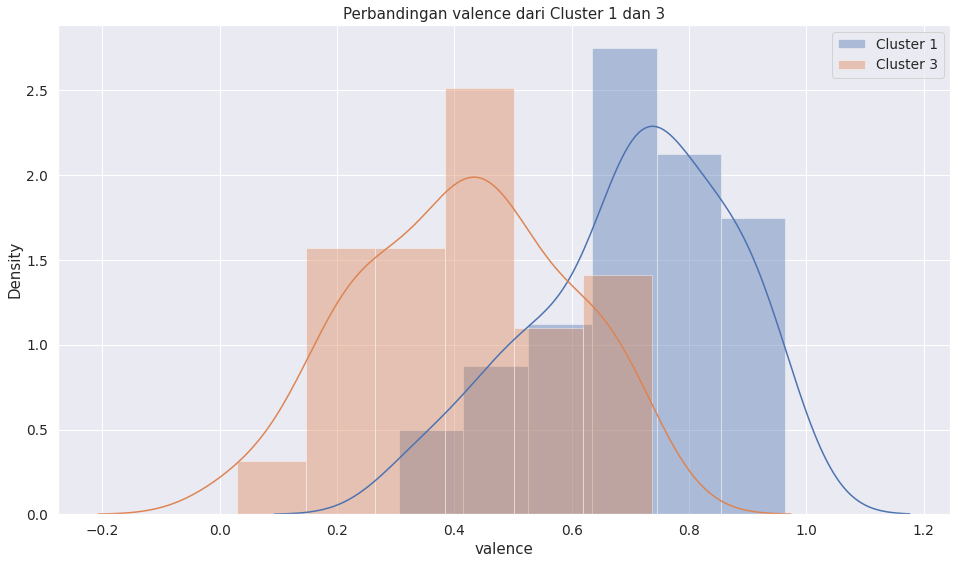

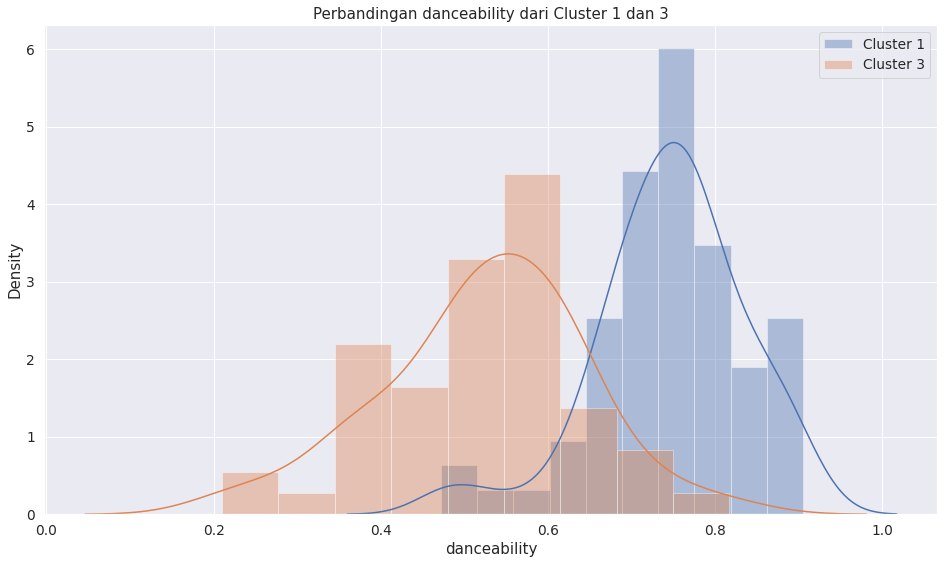

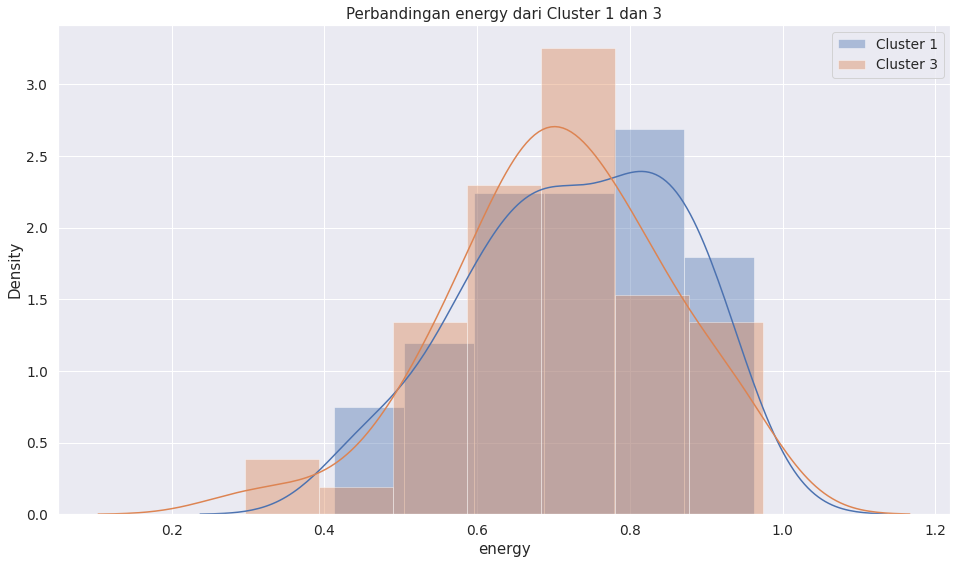

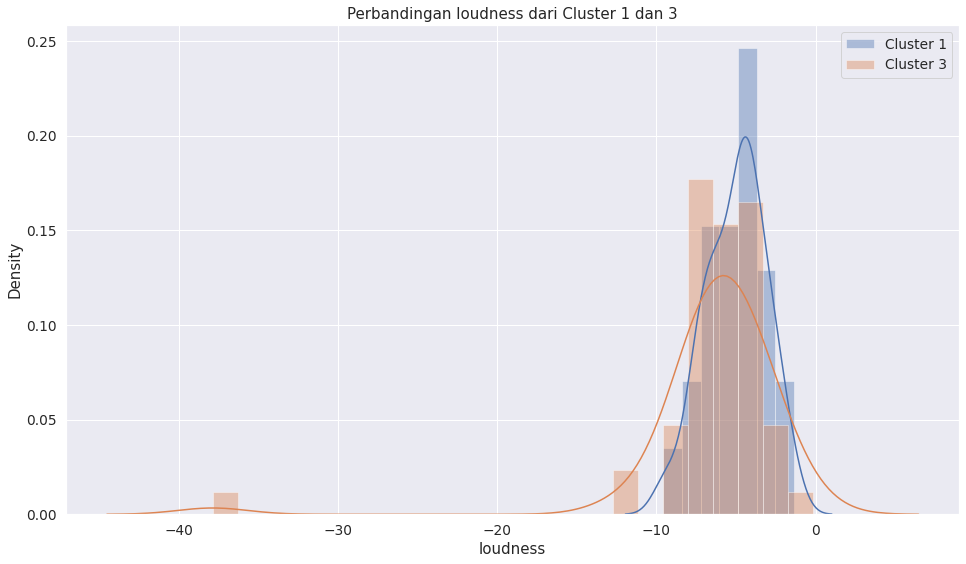

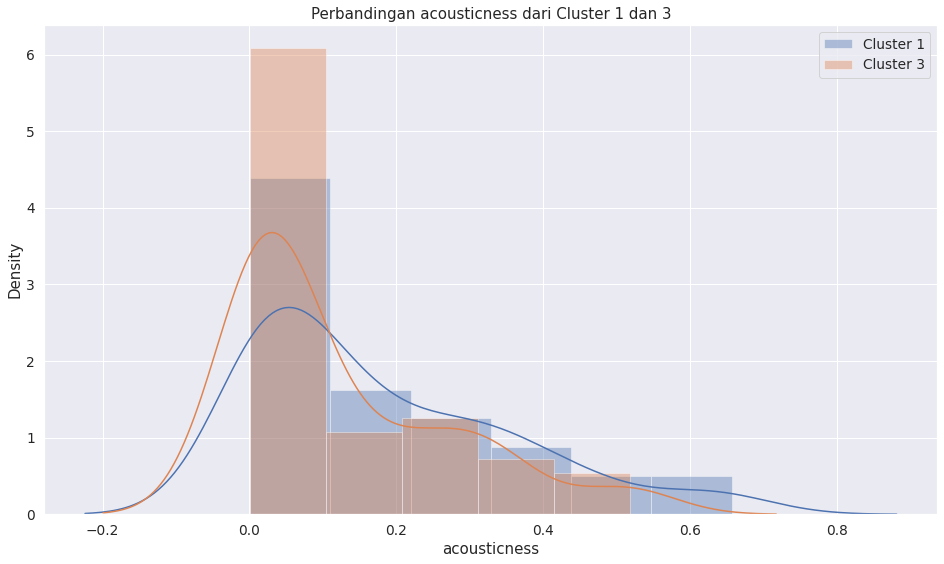

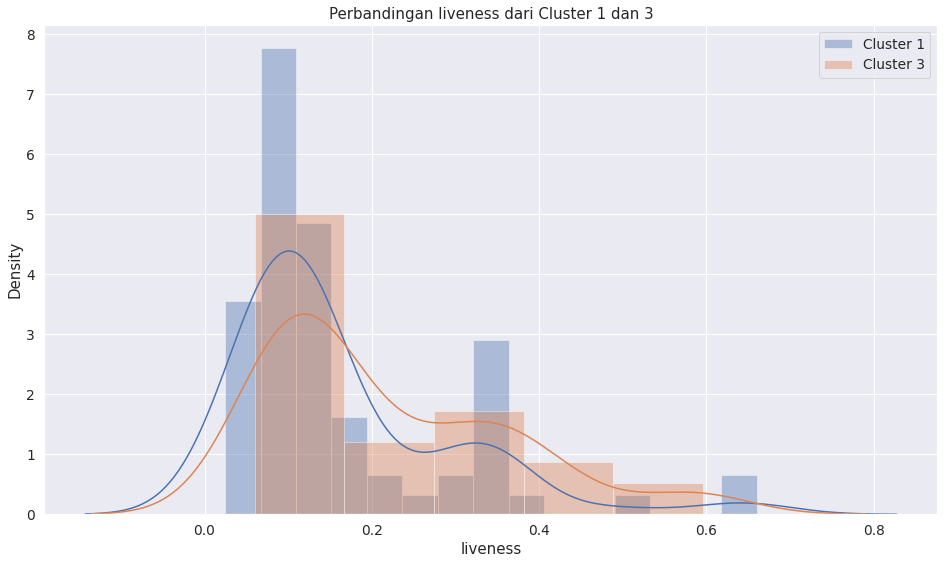

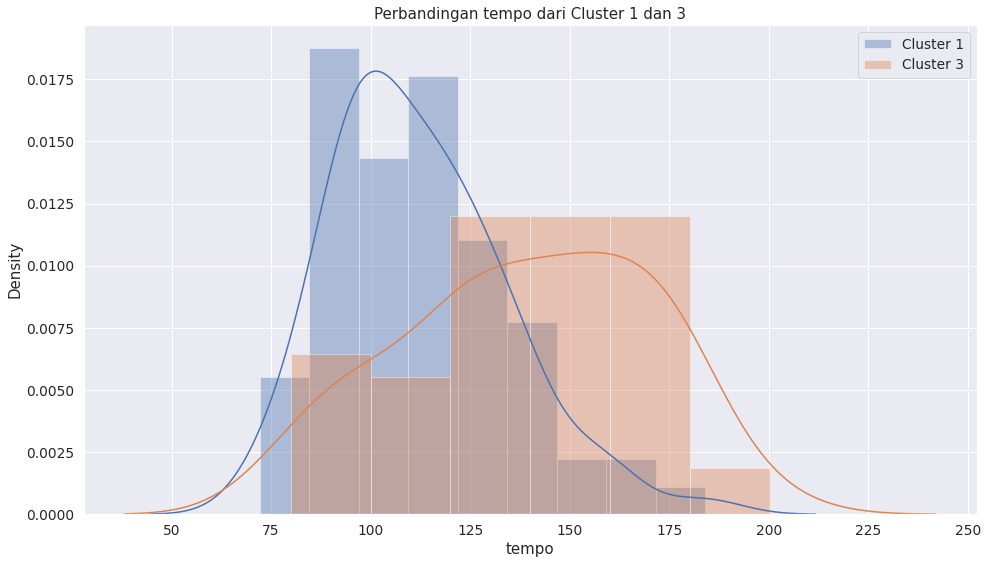

In [ ]:
feature_compared = ['valence', 'danceability', 'energy', 'loudness', 'acousticness', 'liveness', 'tempo']

for feat in feature_compared:
    fig, ax1 = plt.subplots(figsize=(16,9))
    sns.distplot(indo_cluster[indo_cluster['cluster'] == 0][feat], label = 'Cluster 1')
    sns.distplot(indo_cluster[indo_cluster['cluster'] == 2][feat], label = 'Cluster 3')
    plt.title('Perbandingan ' + feat + ' dari Cluster 1 dan 3')
    plt.legend()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

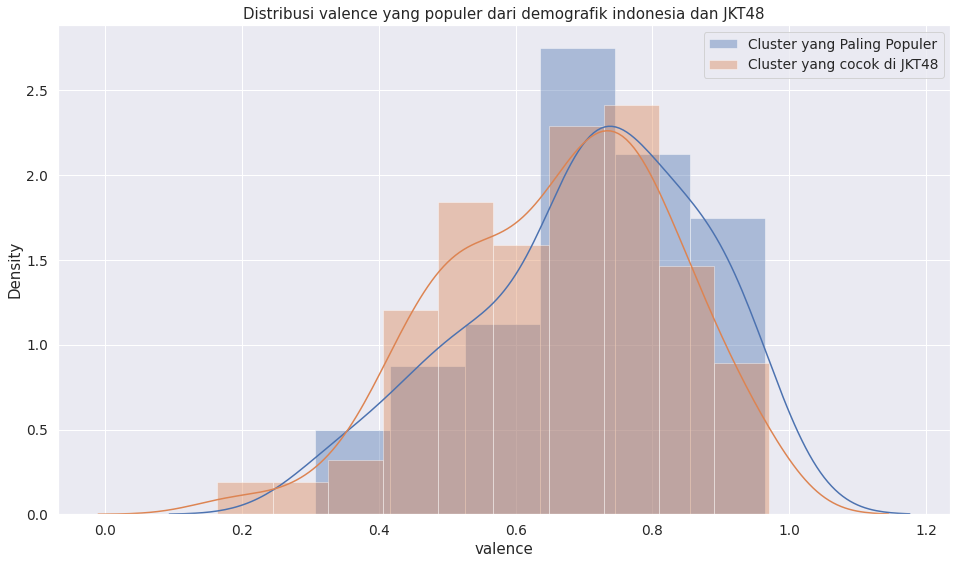

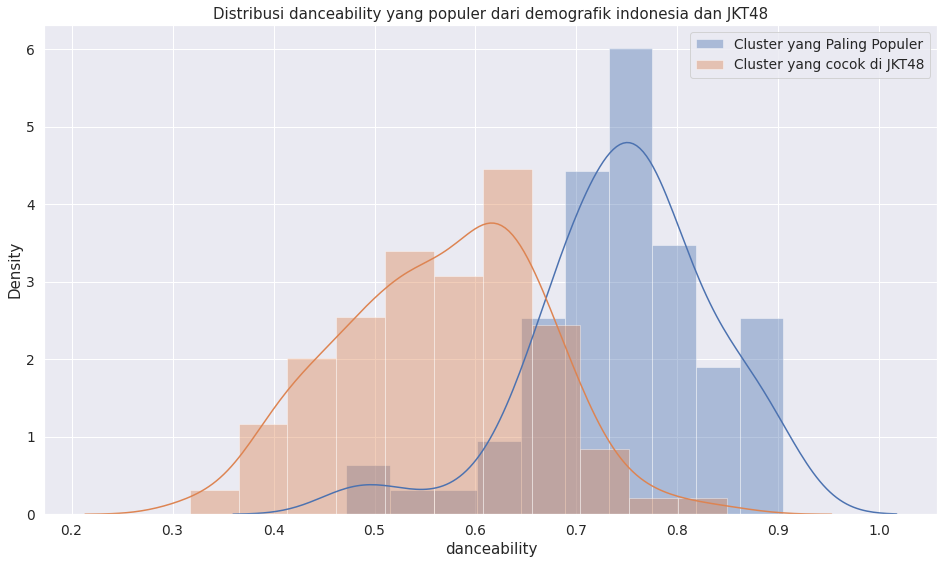

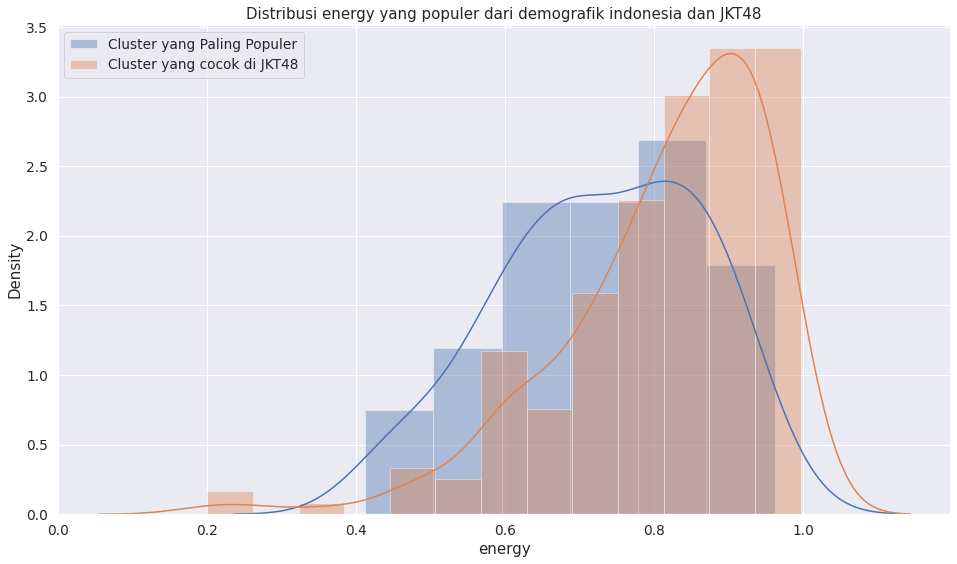

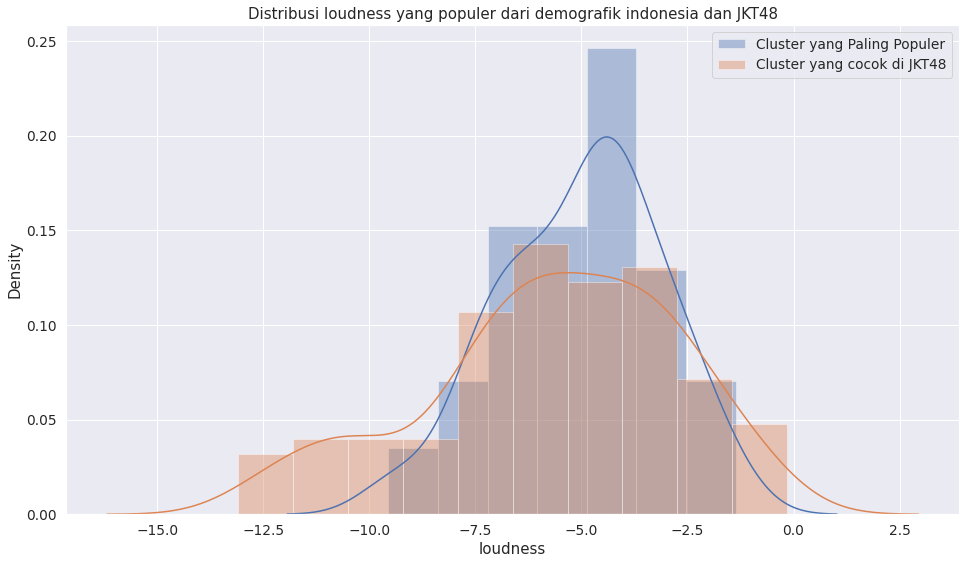

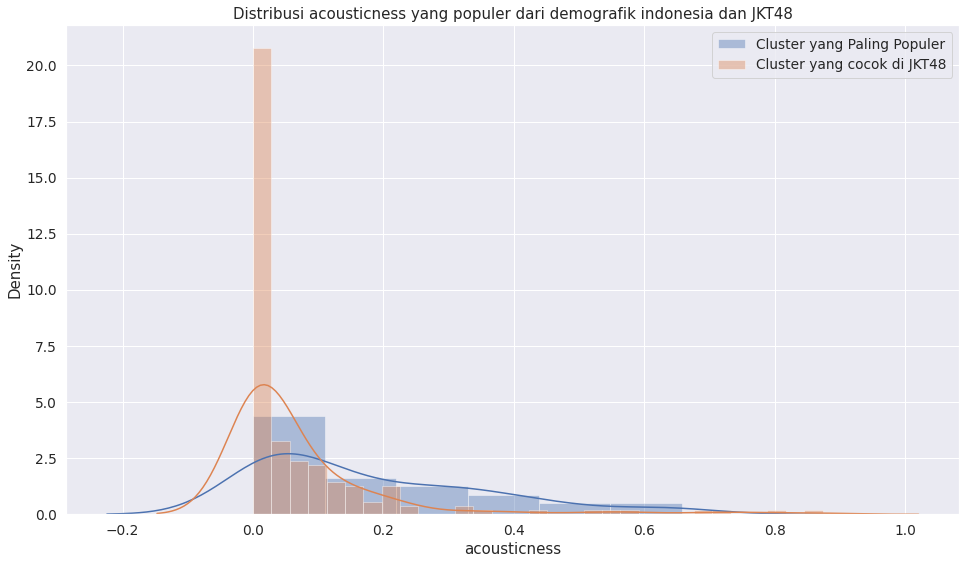

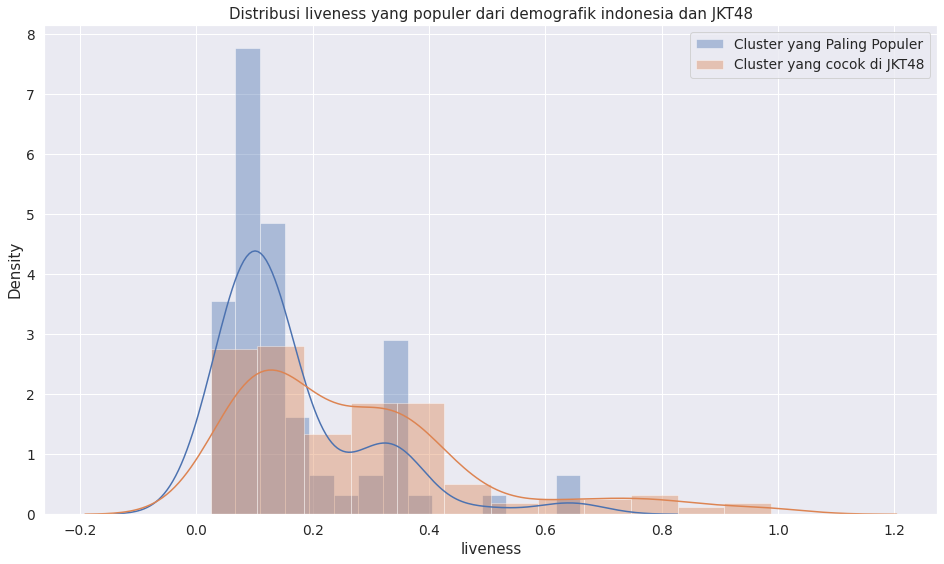

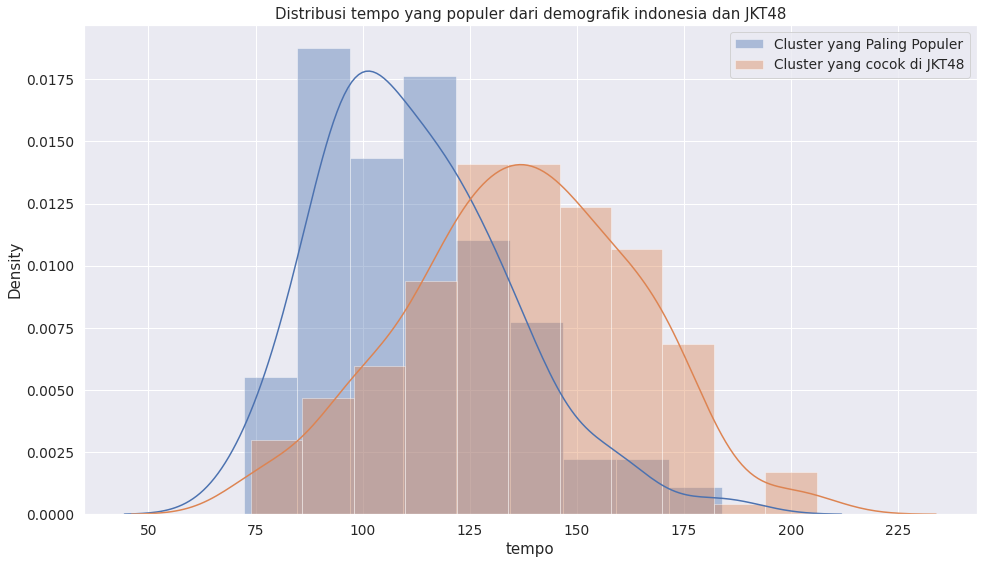

In [ ]:
for feat in feature_compared:
    fig, ax1 = plt.subplots(figsize=(16,9))
    sns.distplot(indo_cluster[indo_cluster['cluster'] == 0][feat], label = 'Cluster yang Paling Populer')
    sns.distplot(df_jkt_id[df_jkt_id['cluster id'] == 2][feat], label = 'Cluster yang cocok di JKT48')
    plt.title('Distribusi ' + feat + ' yang populer dari demografik indonesia dan JKT48')
    plt.legend()

#### Lagu di Jepang

In [ ]:
japan_cluster.groupby(['cluster']).popularity.mean().sort_values(ascending=False)

cluster
0    69.706667
3    69.666667
1    68.121951
2    67.822222
Name: popularity, dtype: float64

In [ ]:
df_jkt_jp['cluster jp'].unique()

array([2], dtype=int32)

Membandingkan Cluster 1 dengan Cluster 3

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

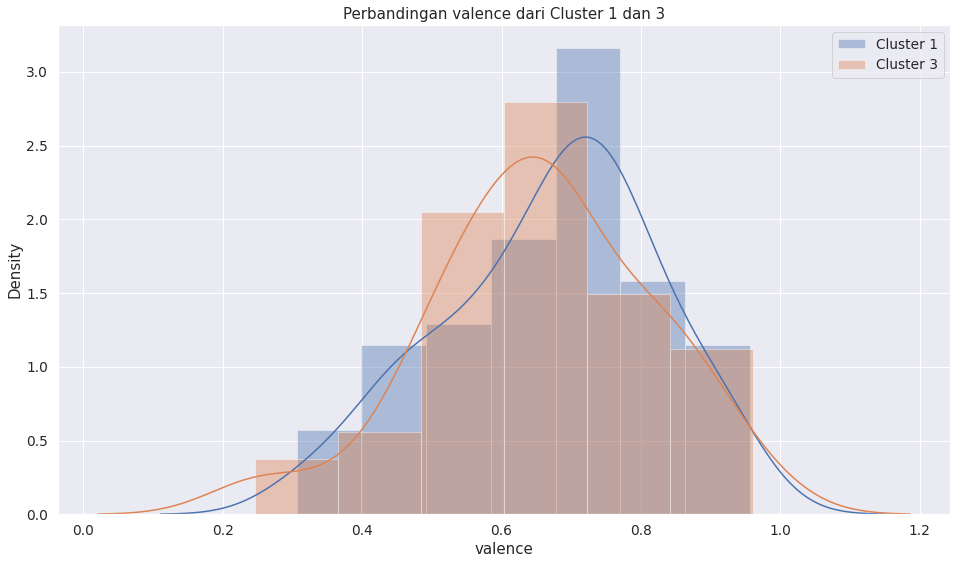

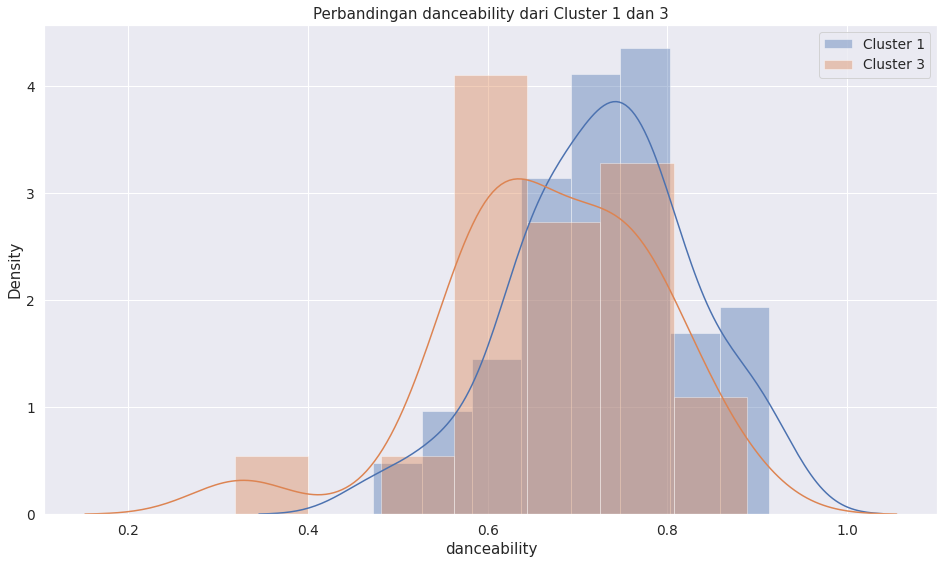

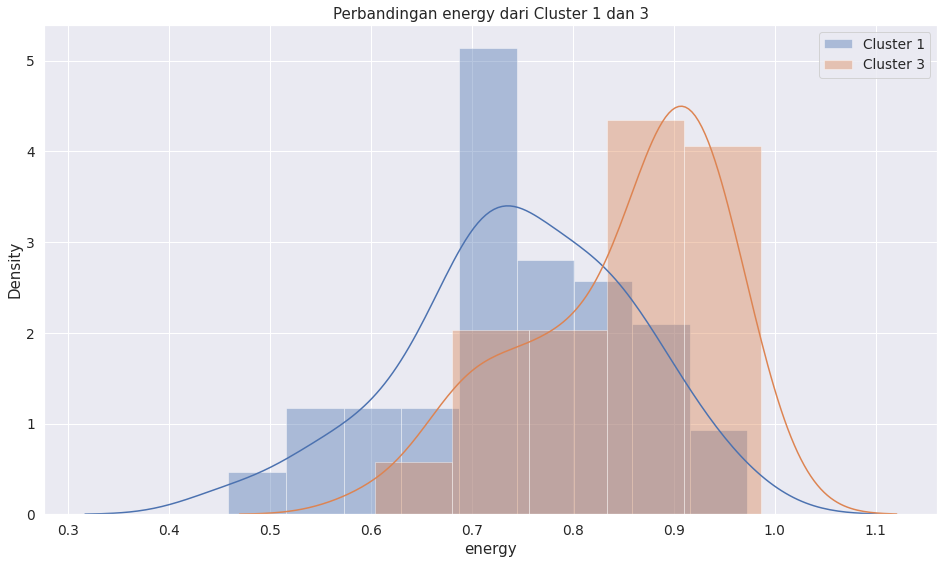

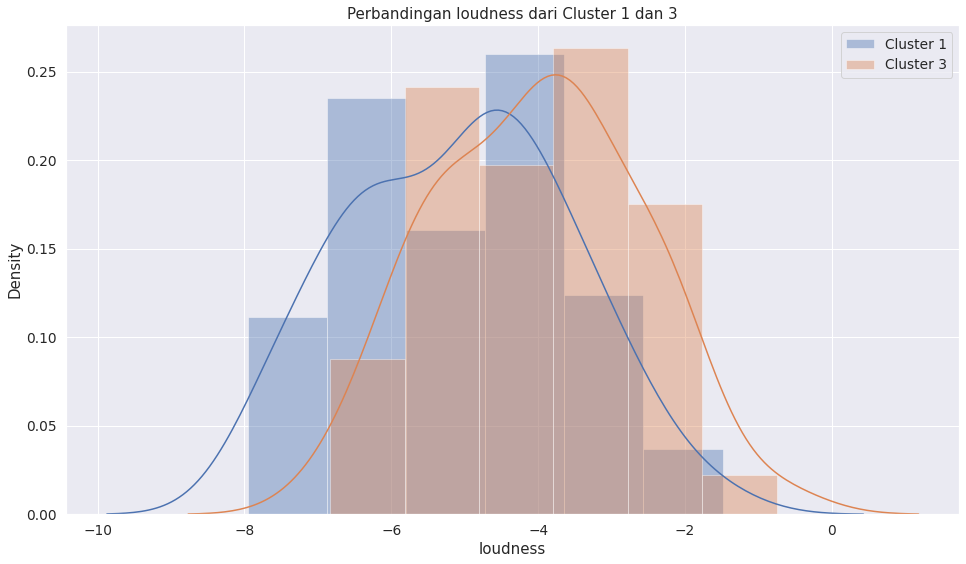

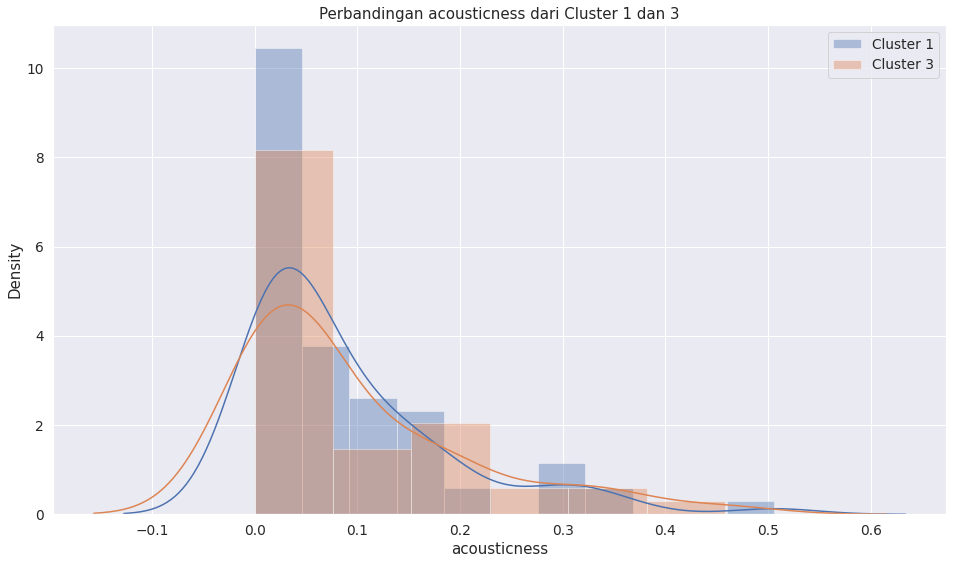

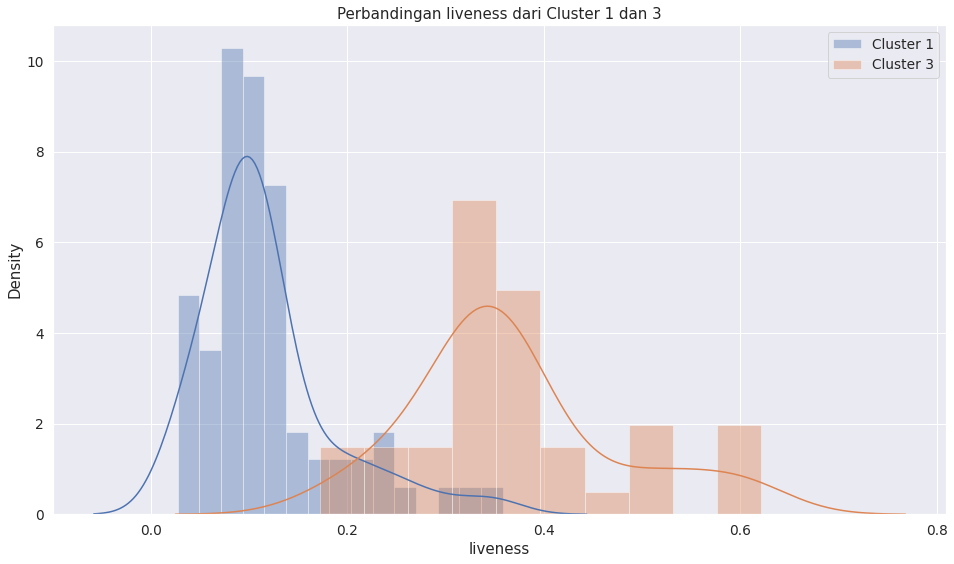

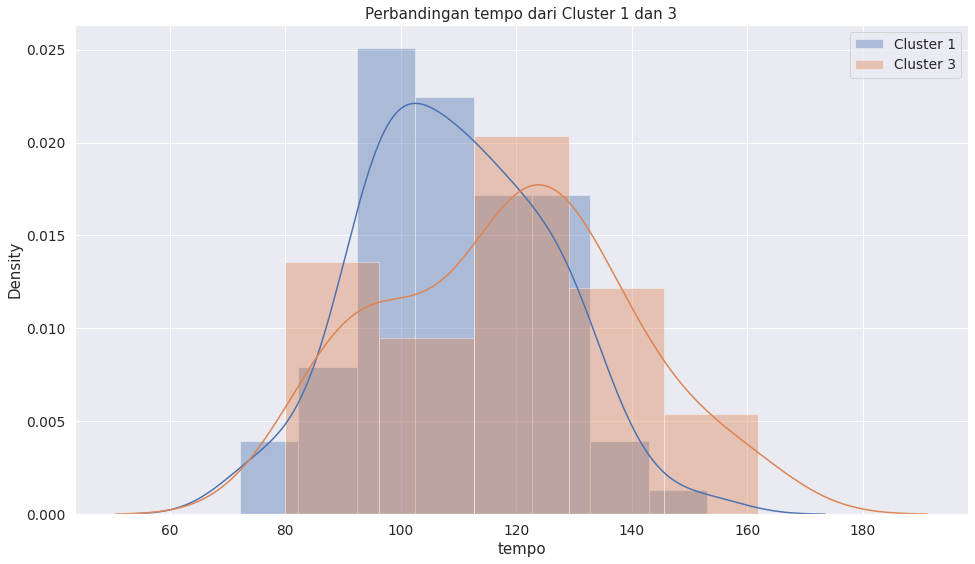

In [ ]:
feature_compared = ['valence', 'danceability', 'energy', 'loudness', 'acousticness', 'liveness', 'tempo']

for feat in feature_compared:
    fig, ax1 = plt.subplots(figsize=(16,9))
    sns.distplot(japan_cluster[japan_cluster['cluster'] == 0][feat], label = 'Cluster 1')
    sns.distplot(japan_cluster[japan_cluster['cluster'] == 2][feat], label = 'Cluster 3')
    plt.title('Perbandingan ' + feat + ' dari Cluster 1 dan 3')
    plt.legend()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

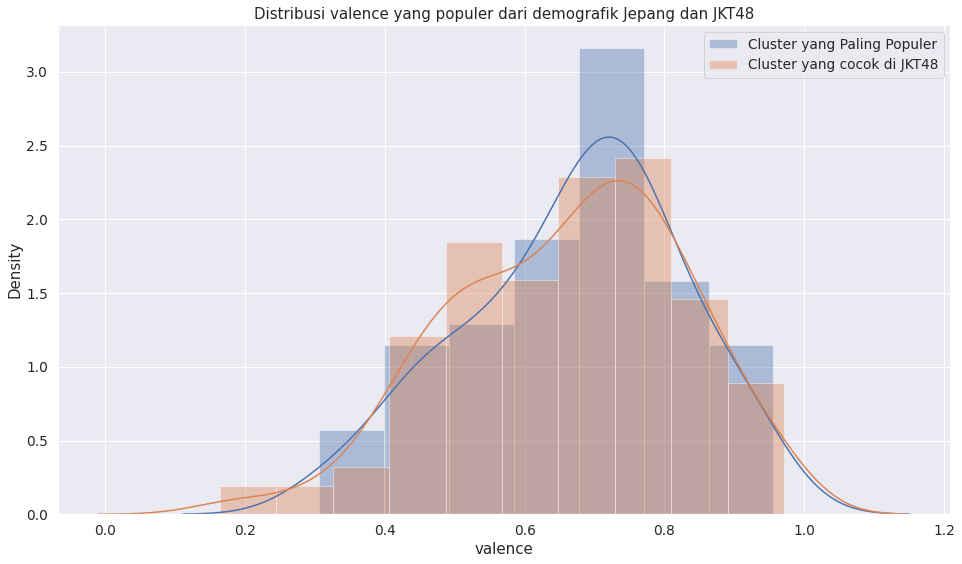

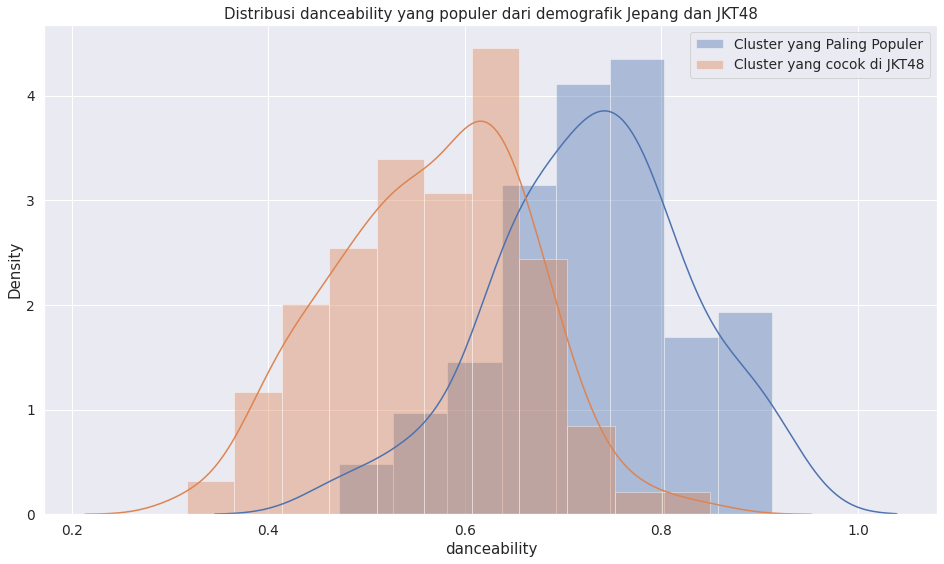

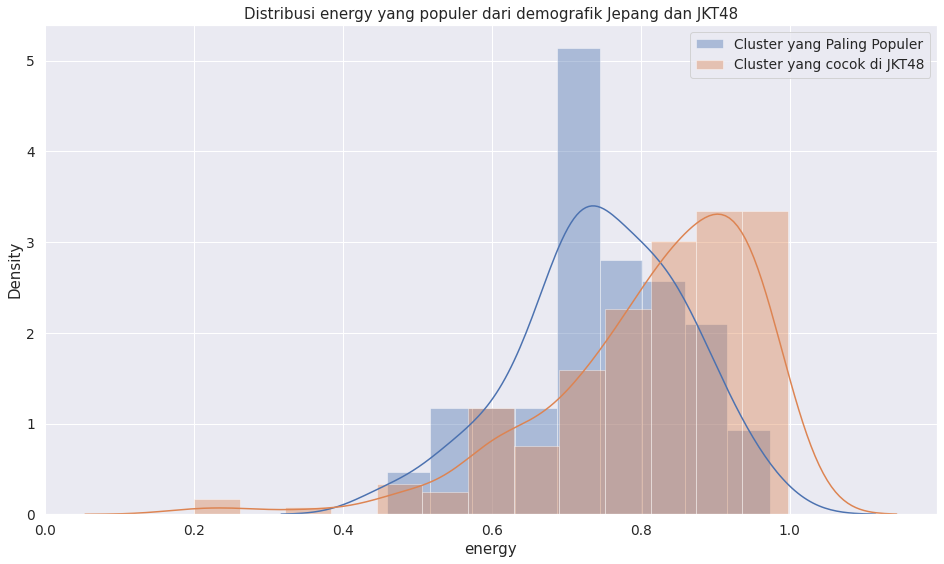

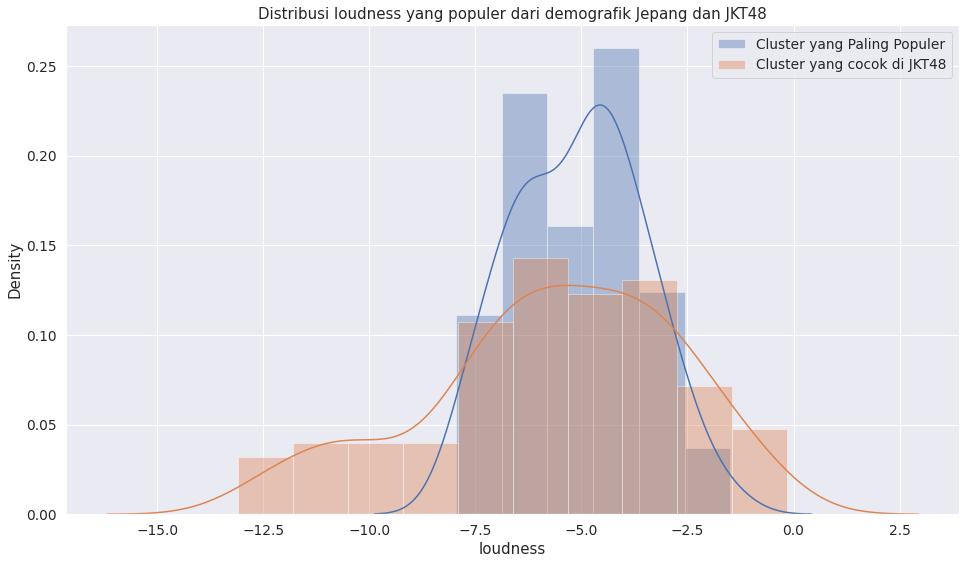

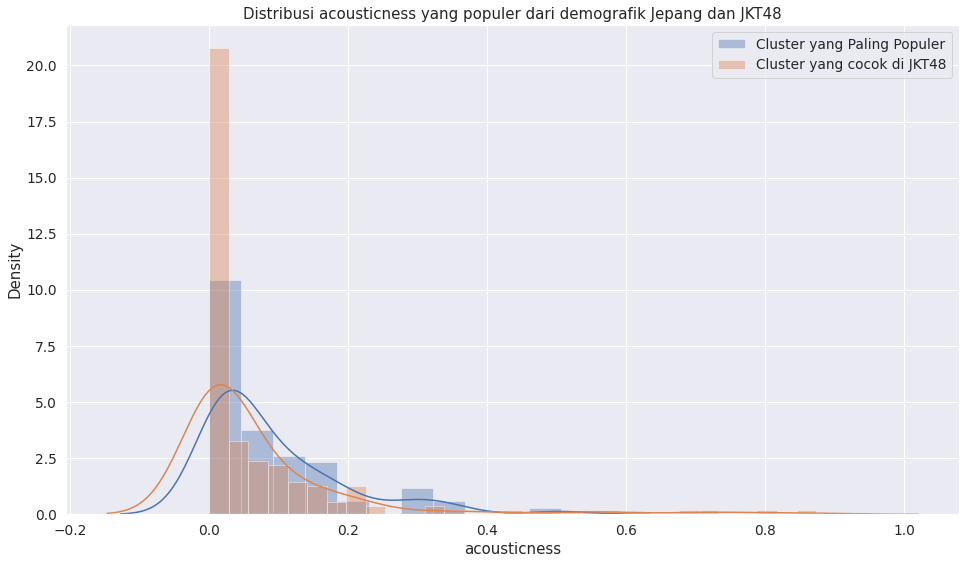

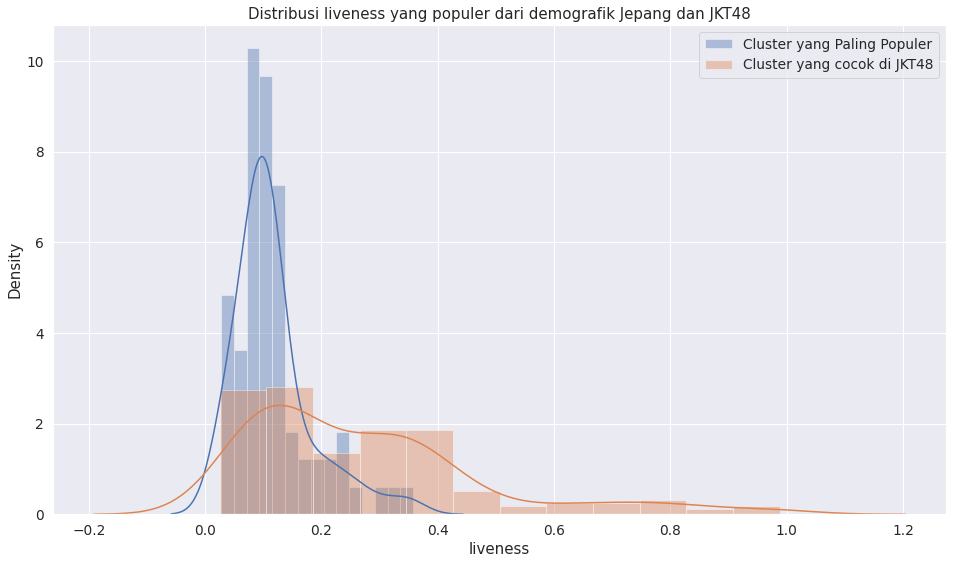

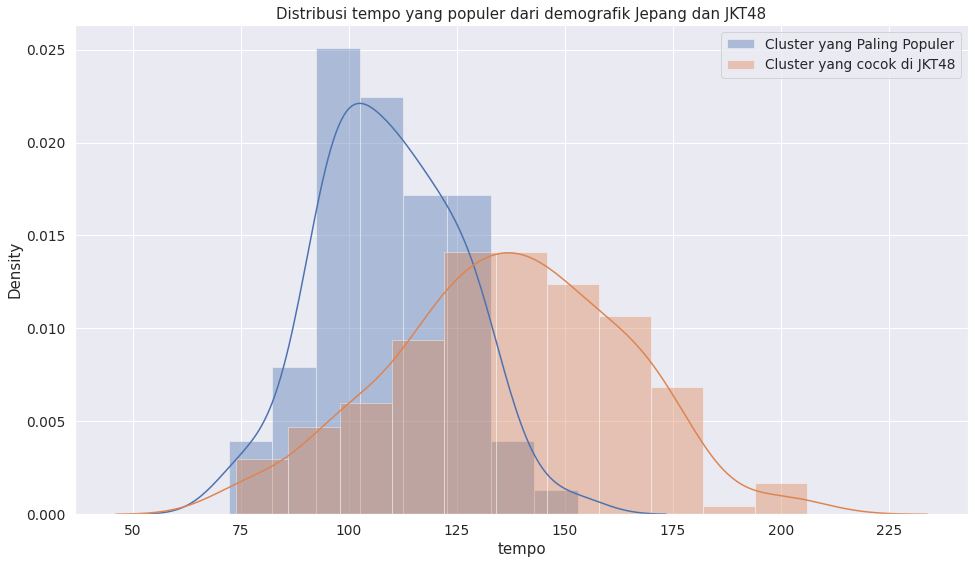

In [ ]:
for feat in feature_compared:
    fig, ax1 = plt.subplots(figsize=(16,9))
    sns.distplot(japan_cluster[japan_cluster['cluster'] == 0][feat], label = 'Cluster yang Paling Populer')
    sns.distplot(df_jkt_jp[df_jkt_jp['cluster jp'] == 2][feat], label = 'Cluster yang cocok di JKT48')
    plt.title('Distribusi ' + feat + ' yang populer dari demografik Jepang dan JKT48')
    plt.legend()

#### Lagu di Korea

In [ ]:
korean_cluster.groupby(['cluster']).popularity.mean().sort_values(ascending=False)

cluster
2    69.169231
0    68.552632
3    67.085714
1    62.259259
Name: popularity, dtype: float64

In [ ]:
df_jkt_kr['cluster kr'].unique()

array([0], dtype=int32)

Membandingkan Cluster 3 dengan Cluster 1

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

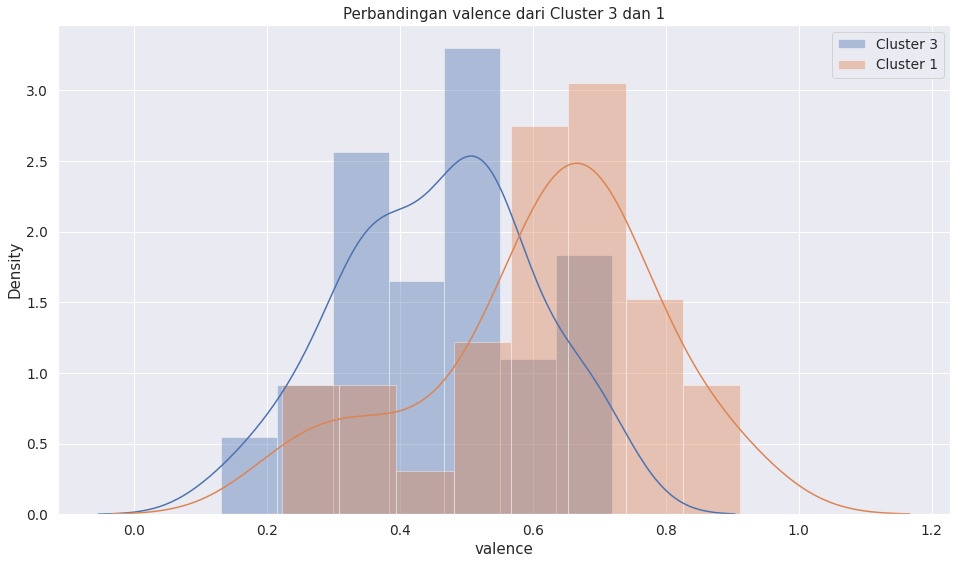

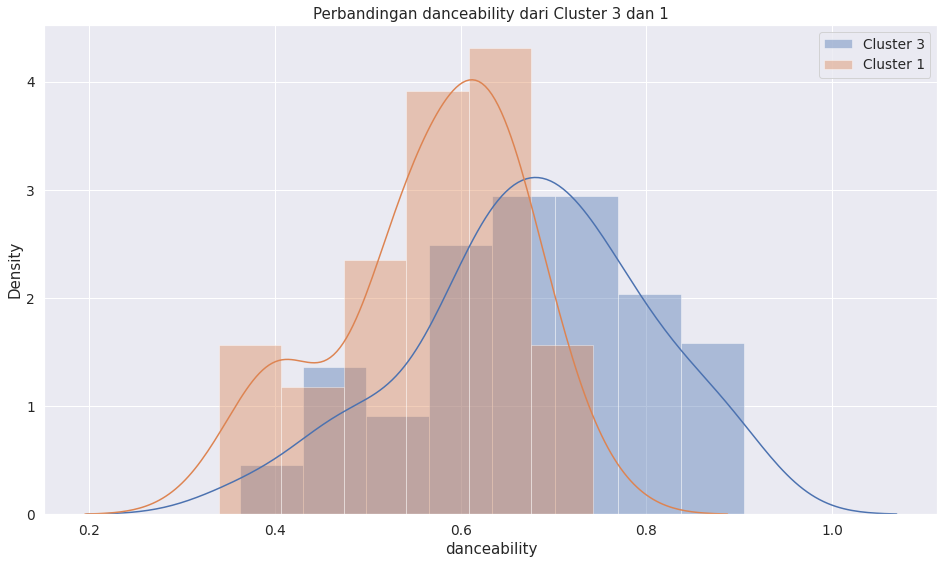

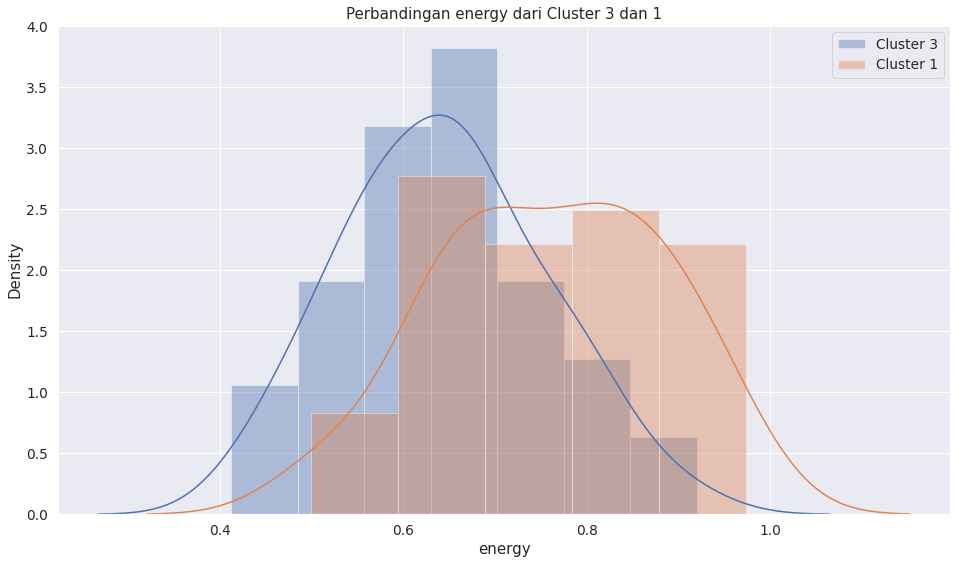

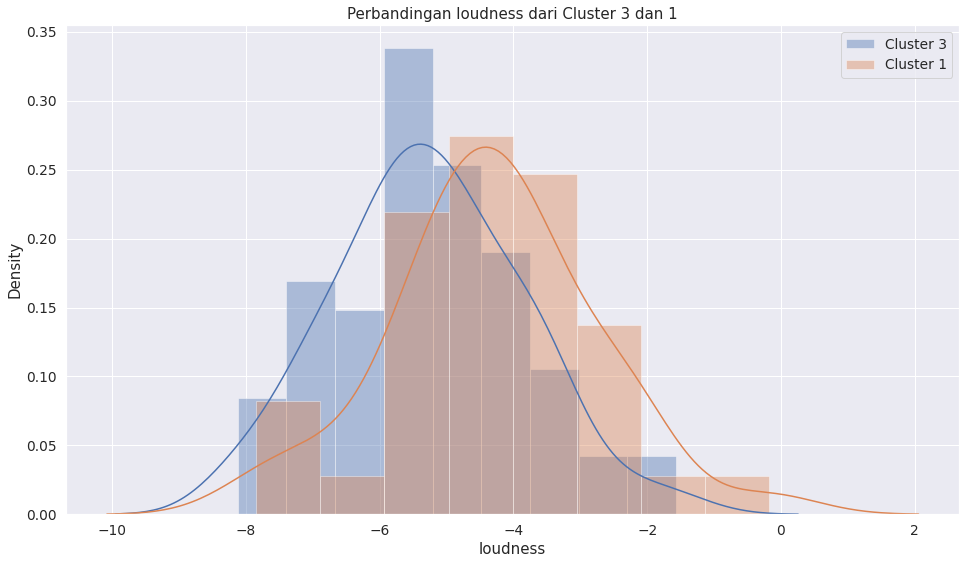

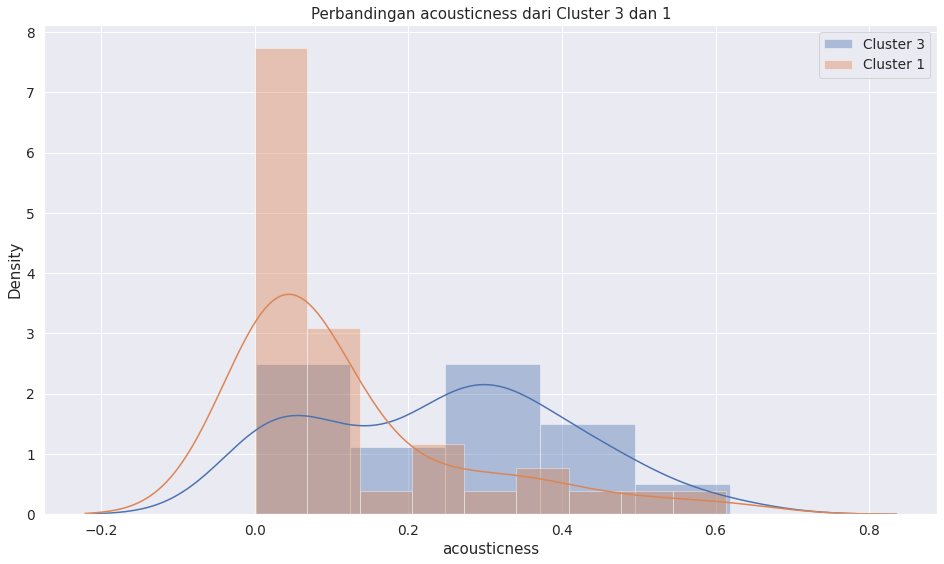

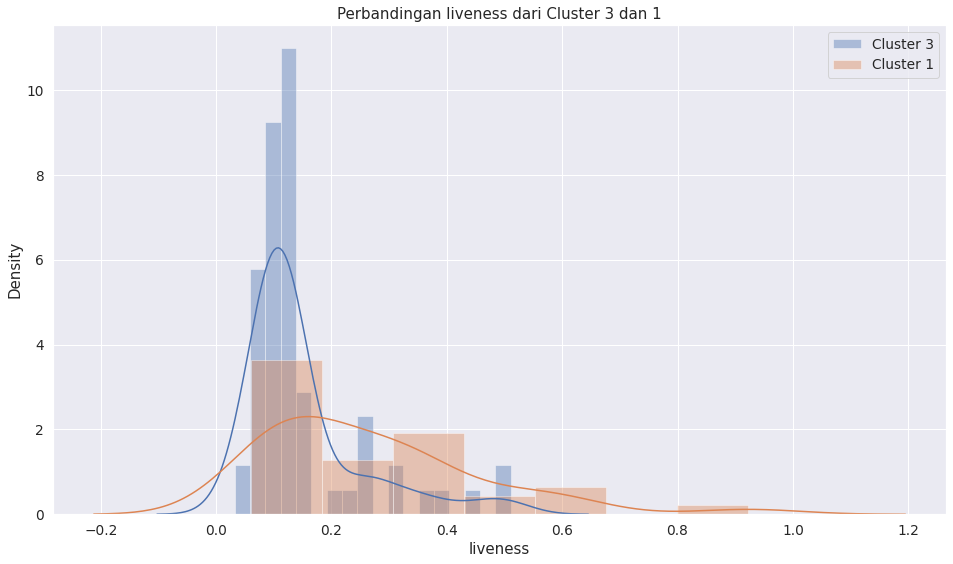

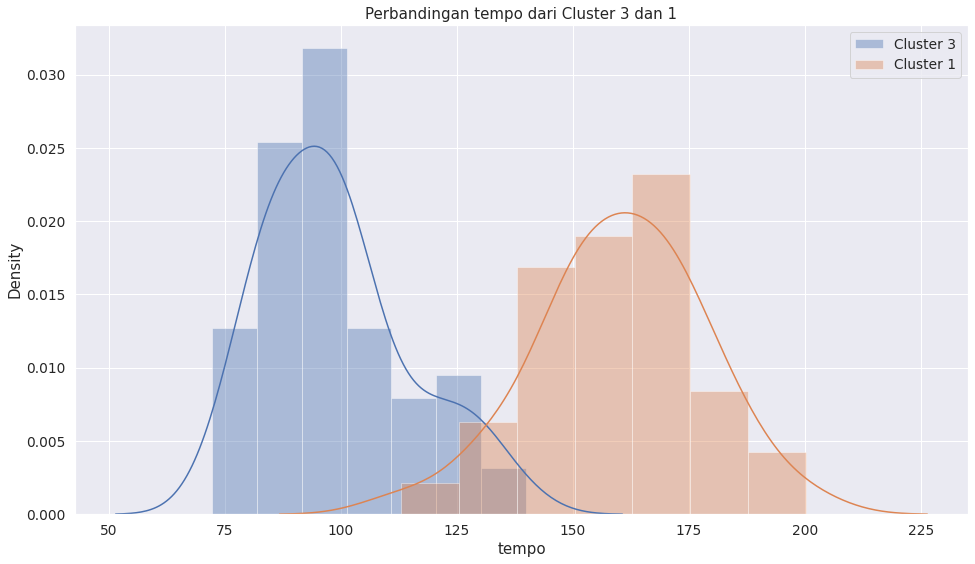

In [ ]:
feature_compared = ['valence', 'danceability', 'energy', 'loudness', 'acousticness', 'liveness', 'tempo']

for feat in feature_compared:
    fig, ax1 = plt.subplots(figsize=(16,9))
    sns.distplot(korean_cluster[korean_cluster['cluster'] == 2][feat], label = 'Cluster 3')
    sns.distplot(korean_cluster[korean_cluster['cluster'] == 0][feat], label = 'Cluster 1')
    plt.title('Perbandingan ' + feat + ' dari Cluster 3 dan 1')
    plt.legend()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

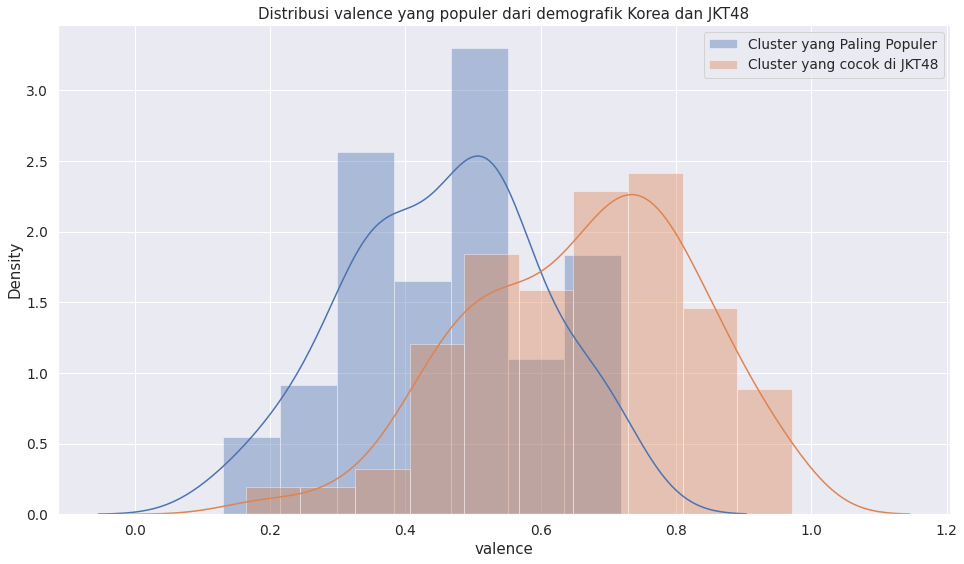

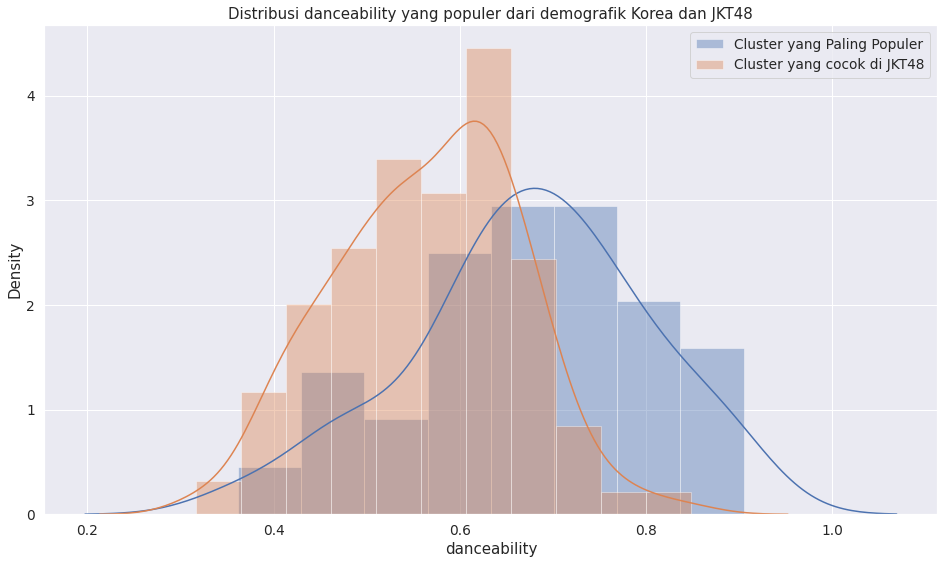

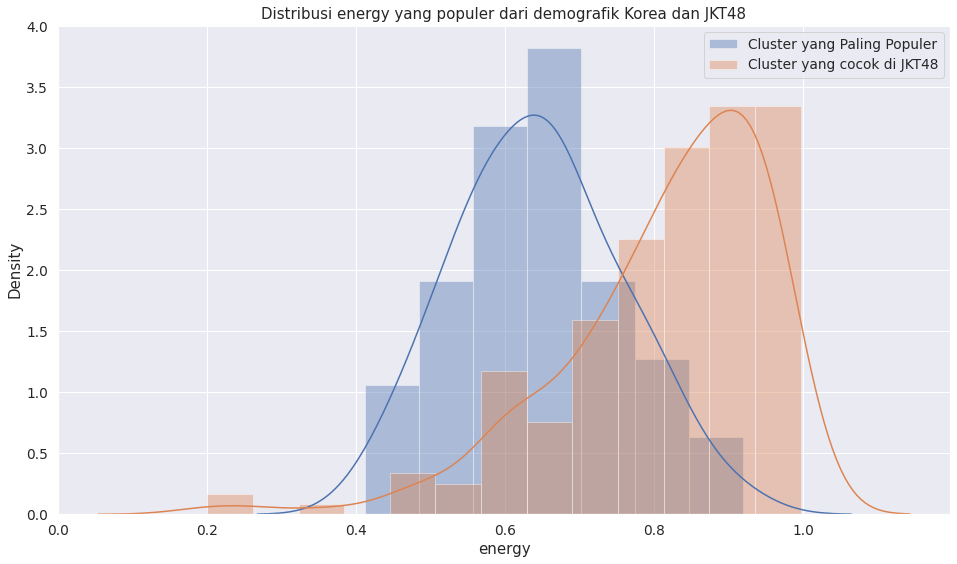

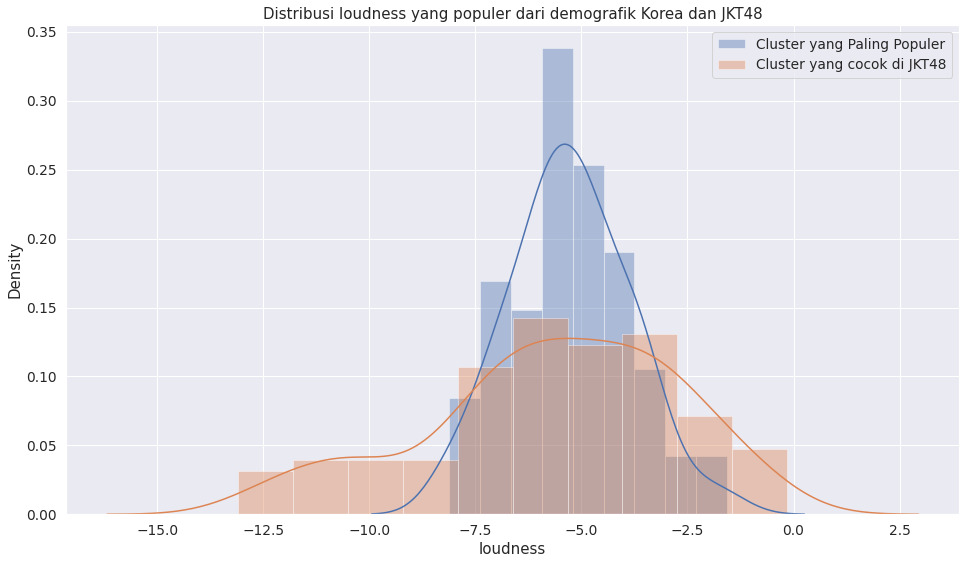

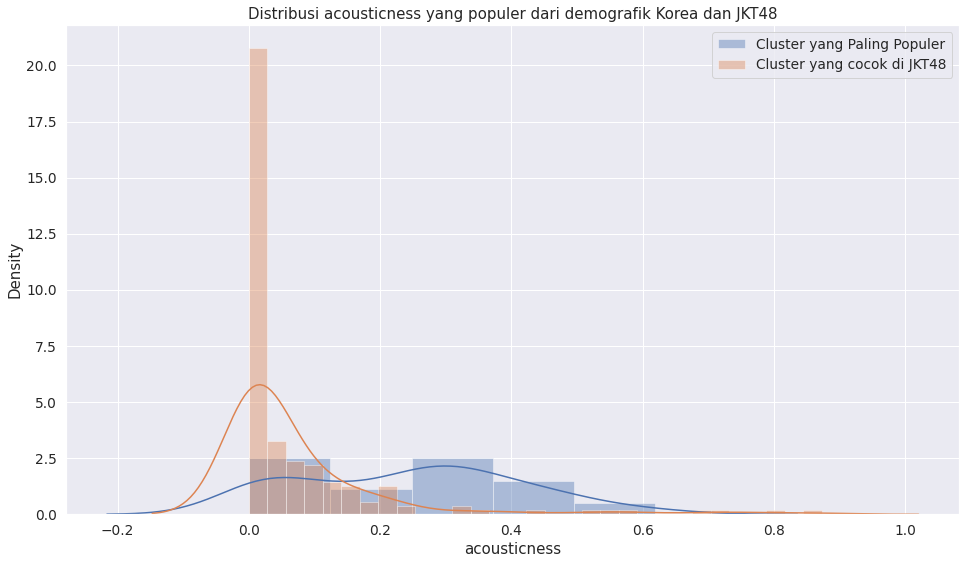

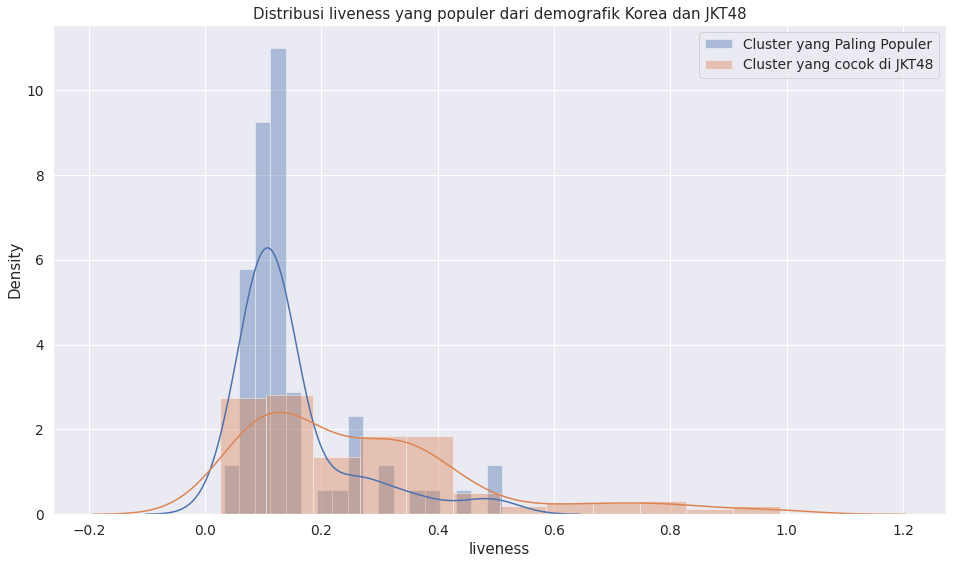

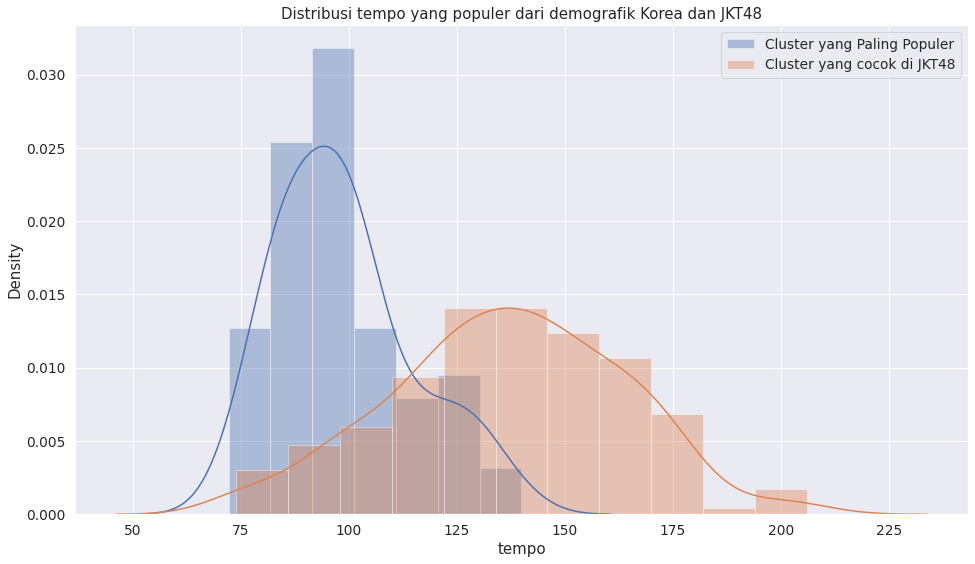

In [ ]:
for feat in feature_compared:
    fig, ax1 = plt.subplots(figsize=(16,9))
    sns.distplot(korean_cluster[korean_cluster['cluster'] == 2][feat], label = 'Cluster yang Paling Populer')
    sns.distplot(df_jkt_kr[df_jkt_kr['cluster kr'] == 0][feat], label = 'Cluster yang cocok di JKT48')
    plt.title('Distribusi ' + feat + ' yang populer dari demografik Korea dan JKT48')
    plt.legend()